# ***I. Descripción del problema e inspección del conjunto de datos***

**Inteligencia Artificial 2025-II**

Este conjunto de datos proviene de https://www.kaggle.com/datasets/msmart2/arrows8 el cual se usa para el **desarrollo de Aprendizaje de máquinas supervisado** en el curso de Inteligencia Artificial del programa de ingeniería de sistemas 2025 2

**Descripción del Problema:**

El problema presentado es un problema de **Clasificación multiclase**.La tarea es predecir una de las cuatro categorías posibles para cada flecha

Este es un ejemplo clásico de aprendizaje supervisado, donde se entrena un modelo para asignar una etiqueta de clase discreta a cada entrada (imagen), basándose en un conjunto de características (los valores de los píxeles de la imagen). El objetivo es desarrollar un modelo capaz de distinguir con precisión entre estas cuatro direcciones de flecha.

El conjunto de datos arrows8 contiene 12,391 imágenes binarias únicas de 8x8 píxeles. Cada píxel en estas imágenes tiene un valor de 0 (apagado/negro) o 1 (encendido/blanco), lo que las hace adecuadas para evaluaciones de hardware neuromórfico y el entrenamiento de redes binarias muy pequeñas. Estas imágenes se dividen en cuatro categorías o clases distintas, que representan las posibles direcciones de las flechas:

Flecha hacia arriba

Flecha hacia la izquierda

Flecha hacia abajo

Flecha hacia la derecha

**Autores**

Andy Amaya

Yeimer Campo

Jader Ortiz

Luis Villalba

##**Librerias**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split

descargar dataset de Kaggle

In [2]:
import kagglehub
import os
import shutil # Necesario para copiar archivos y directorios

# Descargar la última versión al directorio de caché de KaggleHub.
# La función retorna la ruta donde se descargaron los archivos del dataset.
print("Descargando el dataset desde KaggleHub...")
download_cache_path = kagglehub.dataset_download("msmart2/arrows8")

# Definir el directorio de destino como la raíz del proyecto (directorio actual)
destination_path = '.'

print(f"Dataset descargado a: {download_cache_path}")
print(f"Copiando archivos a: {os.path.abspath(destination_path)}")

# Copiar el contenido del directorio descargado al directorio actual
# Usamos os.listdir para iterar sobre los archivos/carpetas dentro del directorio descargado
for item in os.listdir(download_cache_path):
    source_item_path = os.path.join(download_cache_path, item)
    destination_item_path = os.path.join(destination_path, item)
    if os.path.isdir(source_item_path):
        # Si es un directorio, copiar recursivamente. dirs_exist_ok=True para manejar directorios existentes
        shutil.copytree(source_item_path, destination_item_path, dirs_exist_ok=True)
    else:
        # Si es un archivo, copiarlo. copy2 preserva metadatos
        shutil.copy2(source_item_path, destination_item_path)

print("Copia completada. Los archivos del dataset ahora están en la raíz de tu proyecto.")

# Puedes verificar los archivos en el directorio actual
# print("Archivos en el directorio actual:", os.listdir('.'))


Descargando el dataset desde KaggleHub...
Dataset descargado a: C:\Users\pc\.cache\kagglehub\datasets\msmart2\arrows8\versions\1
Copiando archivos a: c:\Users\pc\Desktop\IA\Trabajo Final-guia\Trabajo Final
Copia completada. Los archivos del dataset ahora están en la raíz de tu proyecto.


## Cargar el conjunto de datos y vectorizacion

In [3]:
data = np.load('arrows8_keras_format.npz')

# Asignar los datos cargados directamente a las variables de trabajo
x_train = data['x_train']
y_train = pd.Series(data['y_train'], dtype='int32', name='label')

print("--- Carga de Datos desde 'arrows8_keras_format.npz' ---")
print(f"Conjunto de entrenamiento cargado: {x_train.shape[0]} ejemplos con {x_train.shape[1]} características.")

# Asegurar que x_train_flat existe (versión aplanada para análisis) La vectorización de los datos de entrenamiento
if 'x_train_flat' not in globals():
    x_train_flat = x_train.reshape((x_train.shape[0], -1))

# Verificar y asignar conjuntos de validación y prueba si están presentes

if 'x_val' in data and 'y_val' in data:
    x_val = data['x_val']
    y_val = pd.Series(data['y_val'], dtype='int32', name='label')
    # Crear versión aplanada para x_val
    x_val_flat = x_val.reshape((x_val.shape[0], -1))
    print(f"Conjunto de validación cargado: {x_val.shape[0]} ejemplos con {x_val.shape[1]} características.")
else:
    print("Conjunto de validación NO disponible directamente en el archivo.")

if 'x_test' in data and 'y_test' in data:
    x_test = data['x_test']
    y_test = pd.Series(data['y_test'], dtype='int32', name='label')
    # Crear versión aplanada para x_test
    x_test_flat = x_test.reshape((x_test.shape[0], -1))
    print(f"Conjunto de prueba cargado: {x_test.shape[0]} ejemplos con {x_test.shape[1]} características.")
else:
    print("Conjunto de prueba NO disponible directamente en el archivo.")

print("----------------------------------------------------")

--- Carga de Datos desde 'arrows8_keras_format.npz' ---
Conjunto de entrenamiento cargado: 4274 ejemplos con 8 características.
Conjunto de validación cargado: 4039 ejemplos con 8 características.
Conjunto de prueba cargado: 4078 ejemplos con 8 características.
----------------------------------------------------


el conjunto de datos posee datos conjuntos de entrenamiento validación y prueba

##Descripción general de los datos de entrenamiento (usa variables ya cargadas)

In [4]:
# Helper to get shape and type safely
def get_info(var):
    if var is not None:
        if isinstance(var, np.ndarray):
            return f"Shape: {var.shape}, Dtype: {var.dtype}"
        elif isinstance(var, pd.Series):
            return f"Shape: {var.shape}, Dtype: {var.dtype}"
        elif isinstance(var, pd.DataFrame):
            # For DataFrame, get the dtypes of its columns.
            unique_dtypes = var.dtypes.unique()
            if len(unique_dtypes) == 1:
                return f"Shape: {var.shape}, Dtype: {unique_dtypes[0]}"
            else:
                return f"Shape: {var.shape}, Dtypes: {list(unique_dtypes)}"
        else:
            return f"Type: {type(var).__name__}"
    return "No disponible"

variable_data = [
    {
        "Nombre de la Variable": "Píxeles de la imagen (x_train, x_val, x_test)",
        "Tipo": "Numérico Binario",
        "Descripción Corta": (
            f"Valores de los píxeles (0 o 1) de las imágenes de flechas 8x8. "
            f"(x_train: {get_info(x_train)}, x_val: {get_info(x_val) if 'x_val' in globals() else 'No disponible'}, x_test: {get_info(x_test) if 'x_test' in globals() else 'No disponible'})"),
        "Unidades (si aplica)": "N/A",
        "Valores Especiales (NA, -99, etc.)": "No se encontraron valores nulos o especiales, solo 0s y 1s."
    },
    {
        "Nombre de la Variable": "Clase de la flecha (y_train, y_val, y_test)",
        "Tipo": "Categórico Numérico",
        "Descripción Corta": (
            f"Etiqueta de la clase de la flecha (0, 1, 2, 3). "
            f"(y_train: {get_info(y_train)}, Clases: {y_train.unique() if 'y_train' in globals() else 'No disponible'}) "),
        "Unidades (si aplica)": "N/A",
        "Valores Especiales (NA, -99, etc.)": "No se encontraron valores nulos o especiales."
    },
    {
        "Nombre de la Variable": "Características (Píxeles aplanados, X_train)",
        "Tipo": "Numérico Binario",
        "Descripción Corta": (
            f"Cada columna representa un píxel individual de la imagen 8x8 (aplanada), con valores 0 o 1. "
            f"(X_train: {get_info(X_train) if 'X_train' in globals() else 'No disponible'})"),
        "Unidades (si aplica)": "N/A",
        "Valores Especiales (NA, -99, etc.)": "No se encontraron valores nulos o especiales, solo 0s y 1s."
    }
]

df_variables = pd.DataFrame(variable_data)
display(df_variables)


,Nombre de la Variable,Tipo,Descripción Corta,Unidades (si aplica),"Valores Especiales (NA, -99, etc.)"
0,"Píxeles de la imagen (x_train, x_val, x_test)",Numérico Binario,Valores de los píxeles (0 o 1) de las imágenes...,N/A,"No se encontraron valores nulos o especiales, ..."
1,"Clase de la flecha (y_train, y_val, y_test)",Categórico Numérico,"Etiqueta de la clase de la flecha (0, 1, 2, 3)...",N/A,No se encontraron valores nulos o especiales.
2,"Características (Píxeles aplanados, X_train)",Numérico Binario,Cada columna representa un píxel individual de...,N/A,"No se encontraron valores nulos o especiales, ..."


 **Descripción de las Variables**

*   **Píxeles de la imagen (x_train, x_val, x_test)**:
    *   **Tipo:** Numérico Binario.
    *   **Descripción Corta:** Representa los valores de los píxeles (0 o 1) de las imágenes de flechas 8x8. Cada imagen es un array tridimensional de forma `(8, 8, 1)`. Los conjuntos de entrenamiento, validación y prueba (`x_train`, `x_val`, `x_test`) contienen imágenes con estas características. No se encontraron valores nulos o especiales, solo 0s y 1s.

*   **Clase de la flecha (y_train, y_val, y_test)**:
    *   **Tipo:** Categórico Numérico.
    *   **Descripción Corta:** Es la etiqueta que indica la clase de la flecha, con valores posibles de 0, 1, 2 o 3. Estas etiquetas están asociadas a los conjuntos de entrenamiento, validación y prueba (`y_train`, `y_val`, `y_test`). No se encontraron valores nulos o especiales.

*   **Características (Píxeles aplanados, X_train)**:
    *   **Tipo:** Numérico Binario.
    *   **Descripción Corta:** Cada columna representa un píxel individual de la imagen 8x8, pero aplanado en un vector de 64 posiciones. Los valores son 0 o 1. `X_train` es la representación en `pd.DataFrame` de los píxeles aplanados del conjunto de entrenamiento. No se encontraron valores nulos o especiales, solo 0s y 1s.


##**Resumen Estadístico y Visualizaciones**

In [5]:
# Crear X_train como DataFrame para análisis tabular (versión aplanada)
X_train = pd.DataFrame(data=x_train_flat)

# Resumen tabular de X_train
print("X_train shape:", x_train.shape)
print("\nX_train.describe():")
print(X_train.describe())

# Tipos y uso de memoria
print("\nDtypes count:")
print(X_train.dtypes.value_counts())

X_train shape: (4274, 8, 8, 1)

X_train.describe():
           0            1            2            3            4   \
count  4274.0  4274.000000  4274.000000  4274.000000  4274.000000   
mean      0.0     0.016612     0.120028     0.277258     0.283809   
std       0.0     0.127828     0.325032     0.447697     0.450898   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     0.000000     0.000000     0.000000   
50%       0.0     0.000000     0.000000     0.000000     0.000000   
75%       0.0     0.000000     0.000000     1.000000     1.000000   
max       0.0     1.000000     1.000000     1.000000     1.000000   

                5            6       7            8            9   ...  \
count  4274.000000  4274.000000  4274.0  4274.000000  4274.000000  ...   
mean      0.120730     0.015442     0.0     0.017782     0.110201  ...   
std       0.325851     0.123318     0.0     0.132173     0.313177  ...   
min       0.000000     0.00000

**Interpretación del Resumen Estadístico y Visualizaciones**

**Análisis de `X_train.describe()**

El resumen estadístico de `X_train` (que contiene las 64 características aplanadas, una por píxel) nos proporciona información valiosa sobre la naturaleza binaria de nuestros datos:

*   **Valores Mínimos y Máximos (min, max):** Para todas las características, los valores mínimos son 0.0 y los máximos son 1.0. Esto confirma que los píxeles son binarios, es decir, solo pueden estar 'apagados' (0) o 'encendidos' (1).
*   **Media (mean):** La media de cada característica representa la proporción de veces que ese píxel está 'encendido' (valor 1) en el conjunto de entrenamiento. Por ejemplo, una media de 0.016624 para la columna '1' significa que ese píxel en particular está 'encendido' en aproximadamente el 1.66% de las imágenes. Valores de media cercanos a 0 o 1 indican píxeles que son consistentemente 'apagados' o 'encendidos' respectivamente, mientras que valores cercanos a 0.5 sugieren píxeles con más variabilidad.
*   **Desviación Estándar (std):** La desviación estándar mide la dispersión de los valores. Para datos binarios, una `std` cercana a 0 implica que el píxel es casi siempre 0 o casi siempre 1. Una `std` más alta (cercana a 0.5 para valores binarios) indica que el píxel cambia más frecuentemente entre 0 y 1, lo que sugiere que son píxeles con información más discriminativa.
*   **Cuartiles (25%, 50%, 75%):** Los cuartiles de 0.0 y 1.0 para la mayoría de las características refuerzan la naturaleza binaria. Si el 75% de los valores es 0.0, indica que el píxel está mayormente apagado.


##**Dimensiones de los Conjuntos de Datos y Distribución de clases**

In [6]:
# Calcular el número de columnas (píxeles aplanados) una vez
num_flattened_pixels = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]

print("--- Dimensiones de los Conjuntos de Datos ---")

# Entrenamiento
print(f"x_train: {x_train.shape[0]} filas (ejemplos), {num_flattened_pixels} columnas (píxeles aplanados)")
print(f"y_train: {y_train.shape[0]} filas (etiquetas)")
print("Conteo de clases en y_train:")
display(y_train.value_counts().sort_index().to_frame(name='count'))

# Validación
if 'x_val' in globals() and 'y_val' in globals():
    print(f"\nx_val: {x_val.shape[0]} filas (ejemplos), {num_flattened_pixels} columnas (píxeles aplanados)")
    print(f"y_val: {y_val.shape[0]} filas (etiquetas)")
    print("Conteo de clases en y_val:")
    display(y_val.value_counts().sort_index().to_frame(name='count'))
else:
    print("\nConjunto de validación no disponible.")

# Prueba
if 'x_test' in globals() and 'y_test' in globals():
    print(f"\nx_test: {x_test.shape[0]} filas (ejemplos), {num_flattened_pixels} columnas (píxeles aplanados)")
    print(f"y_test: {y_test.shape[0]} filas (etiquetas)")
    print("Conteo de clases en y_test:")
    display(y_test.value_counts().sort_index().to_frame(name='count'))
else:
    print("\nConjunto de prueba no disponible.")

print("----------------------------------------------------")


--- Dimensiones de los Conjuntos de Datos ---
x_train: 4274 filas (ejemplos), 64 columnas (píxeles aplanados)
y_train: 4274 filas (etiquetas)
Conteo de clases en y_train:


,count
label,
0,1061
1,1082
2,1039
3,1092



x_val: 4039 filas (ejemplos), 64 columnas (píxeles aplanados)
y_val: 4039 filas (etiquetas)
Conteo de clases en y_val:


,count
label,
0,1007
1,1010
2,1006
3,1016



x_test: 4078 filas (ejemplos), 64 columnas (píxeles aplanados)
y_test: 4078 filas (etiquetas)
Conteo de clases en y_test:


,count
label,
0,1027
1,1024
2,1008
3,1019


----------------------------------------------------


**Distribución de Clases**

El análisis de la distribución de clases en el conjunto de entrenamiento (`y_train`) revela un excelente balance. Las cuatro clases (0, 1, 2, 3), que representan las diferentes direcciones de las flechas, tienen un número de ejemplos muy similar. Cada clase constituye aproximadamente el 25% del total de ejemplos, con variaciones mínimas entre ellas.

Esta distribución equilibrada es altamente favorable para el desarrollo de modelos de aprendizaje automático, ya que reduce la probabilidad de que el modelo se incline o sesgue hacia una clase mayoritaria. Esto significa que no será necesario aplicar técnicas adicionales de balanceo de clases (como el sobremuestreo o submuestreo), lo que simplifica el proceso de preprocesamiento y asegura que el modelo pueda aprender a distinguir entre todas las clases de manera efectiva.

###**visualizacion de las imagenes**

In [7]:
# Estadísticas de las entradas binarias (sparsity)
frac_ones = x_train_flat.mean()  # proporción de píxeles=1 en todo el set de entrenamiento
print(f"\nProporción de píxeles activados en x_train (media global): {frac_ones:.4f}")



Proporción de píxeles activados en x_train (media global): 0.3302


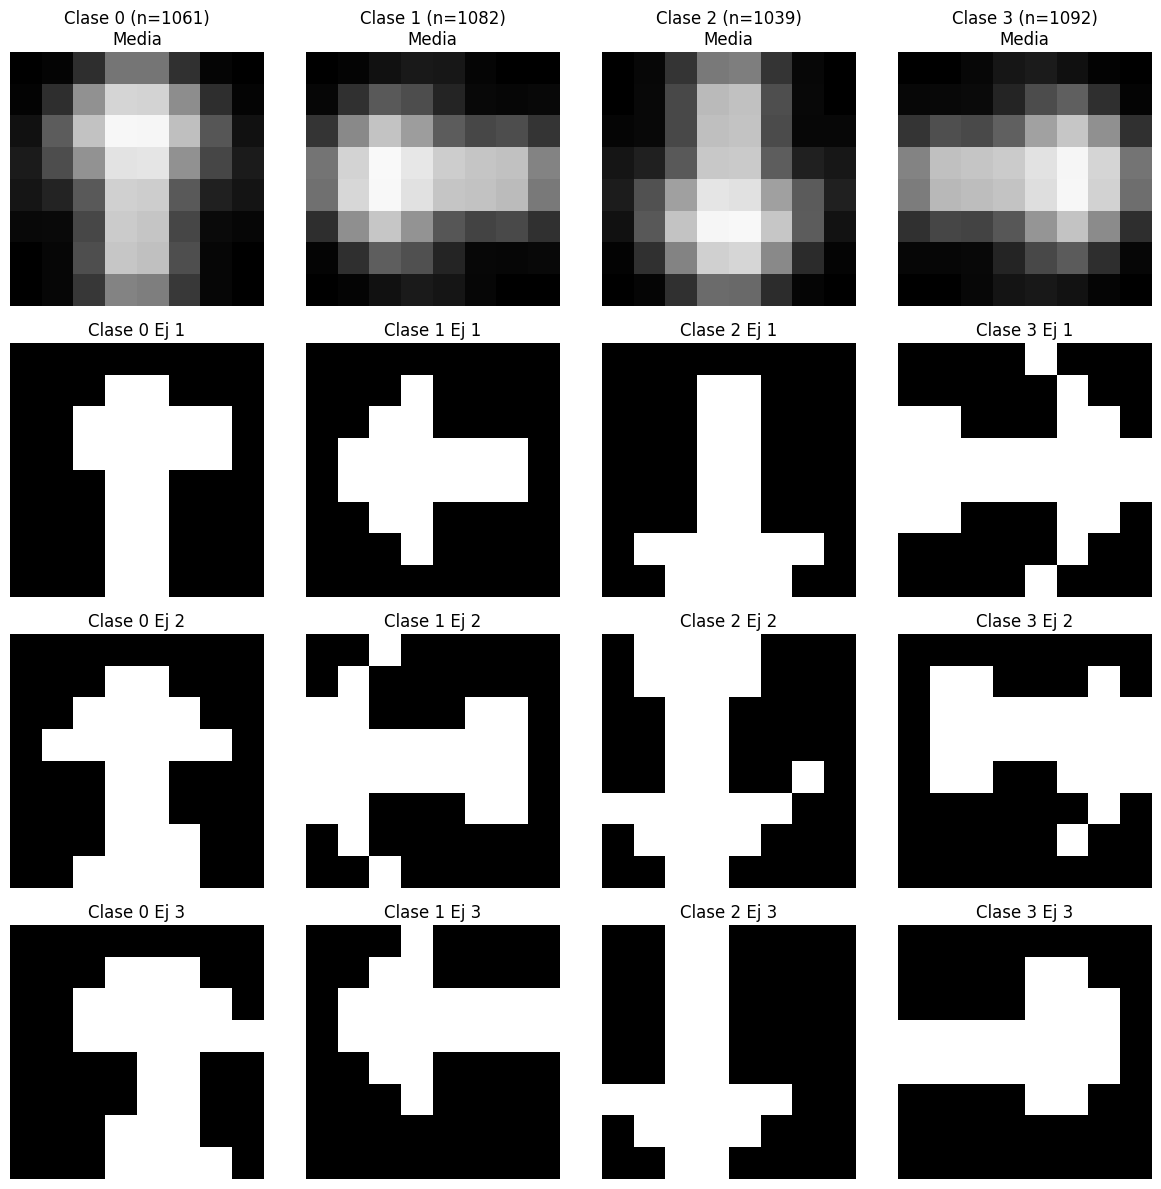

In [8]:
# Mostrar imagen media por clase y hasta 3 ejemplos por clase
labels = sorted(y_train.unique())
rows = 4  # fila 0 = media, filas 1-3 = ejemplos
cols = len(labels)

fig, axs = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
for i, lbl in enumerate(labels):
    mask = (y_train.values == lbl) if isinstance(y_train, pd.Series) else (y_train == lbl)
    imgs = x_train[mask]  # shape (n,8,8,1)
    count = imgs.shape[0]

    # imagen media de la clase
    mean_img = imgs.mean(axis=0).squeeze()
    ax = axs[0, i] if rows > 1 else axs[i]
    ax.imshow(mean_img, cmap='gray', vmin=0, vmax=1)
    ax.set_title(f"Clase {lbl} (n={count})\nMedia")
    ax.axis('off')

    # hasta 3 ejemplos
    for j in range(3):
        ax = axs[j+1, i]
        if j < imgs.shape[0]:
            ax.imshow(imgs[j].squeeze(), cmap='gray', vmin=0, vmax=1)
            ax.set_title(f"Clase {lbl} Ej {j+1}")
        else:
            ax.axis('off')
        ax.axis('off')

plt.tight_layout()
plt.show()


# **II. DISEÑO DE EXPERIMENTOS y PREPARACIÓN**

##Identificar imágenes completamente de ceros y unos

--- Conjunto: Entrenamiento ---
Imágenes completamente de ceros encontradas: 1
Imágenes completamente de unos encontradas: 0



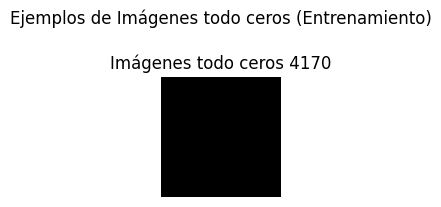

No hay imágenes todo unos para visualizar en Entrenamiento.
--- Conjunto: Validación ---
Imágenes completamente de ceros encontradas: 1
Imágenes completamente de unos encontradas: 0



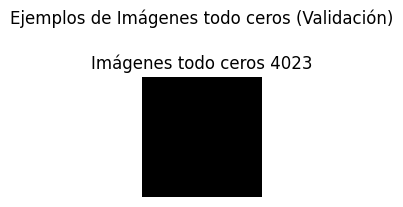

No hay imágenes todo unos para visualizar en Validación.
--- Conjunto: Prueba ---
Imágenes completamente de ceros encontradas: 2
Imágenes completamente de unos encontradas: 0



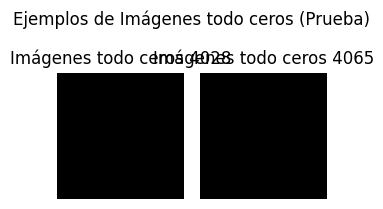

No hay imágenes todo unos para visualizar en Prueba.


In [9]:
# Asegurarse de que x_train_flat existe para facilitar el cálculo
if 'x_train_flat' not in globals():
    x_train_flat = x_train.reshape((x_train.shape[0], -1))

num_pixels = x_train_flat.shape[1] # Esto debería ser 8*8 = 64

def check_all_zero_one_images(X_flat_data, X_original_data, set_name):
    """
    Identifica imágenes completamente de ceros o unos en un conjunto de datos
    y las visualiza.
    """
    if X_flat_data is None or X_original_data is None:
        print(f"Conjunto de datos '{set_name}' no disponible para verificación.")
        return [], []

    # Identificar imágenes completamente de ceros
    all_zero_indices = np.where(X_flat_data.sum(axis=1) == 0)[0]

    # Identificar imágenes completamente de unos
    all_one_indices = np.where(X_flat_data.sum(axis=1) == num_pixels)[0]

    print(f"--- Conjunto: {set_name} ---")
    print(f"Imágenes completamente de ceros encontradas: {len(all_zero_indices)}")
    print(f"Imágenes completamente de unos encontradas: {len(all_one_indices)}\n")

    # Visualizar ejemplos si existen
    def visualize_images_for_set(indices, title_prefix, num_to_show=3, images_data=None):
        """Visualiza hasta num_to_show imágenes dado un conjunto de índices y los datos originales."""
        if len(indices) == 0:
            print(f"No hay {title_prefix.lower()} para visualizar en {set_name}.")
            return [], [] # Return empty lists instead of just returning

        fig, axes = plt.subplots(1, min(len(indices), num_to_show), figsize=(1.5 * min(len(indices), num_to_show), 2))
        if min(len(indices), num_to_show) == 1:
            axes = [axes]
        elif min(len(indices), num_to_show) == 0:
            plt.close(fig)
            return [], []

        for i, idx in enumerate(indices[:num_to_show]):
            ax = axes[i]
            ax.imshow(images_data[idx].squeeze(), cmap='gray', vmin=0, vmax=1)
            ax.set_title(f"{title_prefix} {idx}")
            ax.axis('off')
        plt.suptitle(f"Ejemplos de {title_prefix} ({set_name})", y=1.05)
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
        plt.show()
        return all_zero_indices, all_one_indices # Return the indices for later use

    visualize_images_for_set(all_zero_indices, "Imágenes todo ceros", images_data=X_original_data)
    visualize_images_for_set(all_one_indices, "Imágenes todo unos", images_data=X_original_data)

    return all_zero_indices, all_one_indices


# Procesar el conjunto de entrenamiento
all_zero_indices_train, all_one_indices_train = check_all_zero_one_images(x_train_flat, x_train, "Entrenamiento")

# Procesar el conjunto de validación
all_zero_indices_val, all_one_indices_val = check_all_zero_one_images(
    globals().get('x_val_flat'), globals().get('x_val'), "Validación")

# Procesar el conjunto de prueba
all_zero_indices_test, all_one_indices_test = check_all_zero_one_images(
    globals().get('x_test_flat'), globals().get('x_test'), "Prueba")

Combinar los índices de imágenes a eliminar



In [10]:
# Combinar los índices de imágenes a eliminar para entrenamiento
indices_to_remove_train = np.union1d(all_zero_indices_train, all_one_indices_train)

# Combinar los índices de imágenes a eliminar para validación
indices_to_remove_val = np.union1d(all_zero_indices_val, all_one_indices_val)

# Combinar los índices de imágenes a eliminar para prueba
indices_to_remove_test = np.union1d(all_zero_indices_test, all_one_indices_test)


##Eliminar las imágenes

In [11]:
def remove_anomalous_images(x_set, y_set, indices_to_remove, set_name):
    """
    Elimina imágenes de un conjunto de datos y sus etiquetas correspondientes.
    Actualiza también la versión aplanada si existe y es necesario.
    """
    if len(indices_to_remove) > 0:
        print(f"Se eliminaron {len(indices_to_remove)} imágenes de '{set_name}'.")
        # Eliminar las imágenes de x_set
        x_set_updated = np.delete(x_set, indices_to_remove, axis=0)

        # Eliminar las etiquetas correspondientes de y_set
        if not isinstance(y_set, pd.Series):
            y_set = pd.Series(y_set, dtype='int32', name='label')

        # Crear una máscara booleana para mantener los elementos que NO están en indices_to_remove
        all_indices = np.arange(len(y_set))
        mask_to_keep = ~np.isin(all_indices, indices_to_remove)
        y_set_updated = y_set[mask_to_keep].reset_index(drop=True)

        print(f"Nuevas dimensiones de x_{set_name.lower()}: {x_set_updated.shape}")
        print(f"Nuevas dimensiones de y_{set_name.lower()}: {y_set_updated.shape}")

        # Actualizar la versión aplanada en el scope global
        x_flat_var_name = f"x_{set_name.lower()}_flat"
        if x_flat_var_name in globals():
            globals()[x_flat_var_name] = x_set_updated.reshape((x_set_updated.shape[0], -1))

        return x_set_updated, y_set_updated
    else:
        print(f"No se encontraron imágenes completamente de ceros o unos para eliminar en '{set_name}'.")
        return x_set, y_set

# Procesar el conjunto de entrenamiento
x_train, y_train = remove_anomalous_images(x_train, y_train, indices_to_remove_train, "Train")

# Procesar el conjunto de validación
if 'x_val' in globals() and 'y_val' in globals():
    x_val, y_val = remove_anomalous_images(x_val, y_val, indices_to_remove_val, "Val")

# Procesar el conjunto de prueba
if 'x_test' in globals() and 'y_test' in globals():
    x_test, y_test = remove_anomalous_images(x_test, y_test, indices_to_remove_test, "Test")

# Re-inicializar X_train DataFrame para reflejar los cambios si fue modificado
# (Este DataFrame es usado posteriormente en PCA, por lo que es importante que esté actualizado)
if 'X_train' in globals():
    X_train = pd.DataFrame(data=x_train_flat)


Se eliminaron 1 imágenes de 'Train'.
Nuevas dimensiones de x_train: (4273, 8, 8, 1)
Nuevas dimensiones de y_train: (4273,)
Se eliminaron 1 imágenes de 'Val'.
Nuevas dimensiones de x_val: (4038, 8, 8, 1)
Nuevas dimensiones de y_val: (4038,)
Se eliminaron 2 imágenes de 'Test'.
Nuevas dimensiones de x_test: (4076, 8, 8, 1)
Nuevas dimensiones de y_test: (4076,)


 indicando  las clases existentes.

In [12]:
# Show the labels
y_train.unique()

array([1, 3, 2, 0], dtype=int32)

##**Identificar y Manejar Valores Faltantes**

Verificar la presencia de valores nulos (NaN) en el DataFrame `X_train` y aplicar una estrategia de manejo adecuada, como la eliminación de las filas afectadas, si existen.


In [13]:
# 1. Identifica las filas en X_train que contienen valores nulos
null_rows_indices = X_train.index[X_train.isnull().any(axis=1)].tolist()

# 2. Almacena el número de filas con valores nulos
num_null_rows = len(null_rows_indices)

print(f"Se encontraron {num_null_rows} filas con valores nulos en X_train.")

# 3. Si se encuentran filas con valores nulos, elimina esas filas
if num_null_rows > 0:
    X_train = X_train.drop(index=null_rows_indices)
    y_train = y_train.drop(index=null_rows_indices).reset_index(drop=True)

    # 4. Reconstruye el array x_train (el array 3D original)
    x_train = X_train.values.reshape((X_train.shape[0], 8, 8, 1))

    # 5. Actualiza x_train_flat
    x_train_flat = x_train.reshape((x_train.shape[0], -1))

    print(f"Se eliminaron {num_null_rows} filas con valores nulos.")
    print(f"Nuevas dimensiones de x_train: {x_train.shape}")
    print(f"Nuevas dimensiones de X_train: {X_train.shape}")
    print(f"Nuevas dimensiones de y_train: {y_train.shape}")
else:
    print("No se encontraron valores nulos para eliminar.")

Se encontraron 0 filas con valores nulos en X_train.
No se encontraron valores nulos para eliminar.


##**diagrama de barras**

C:\Users\pc\AppData\Local\Temp\ipykernel_6160\1028071137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis', ax=ax)


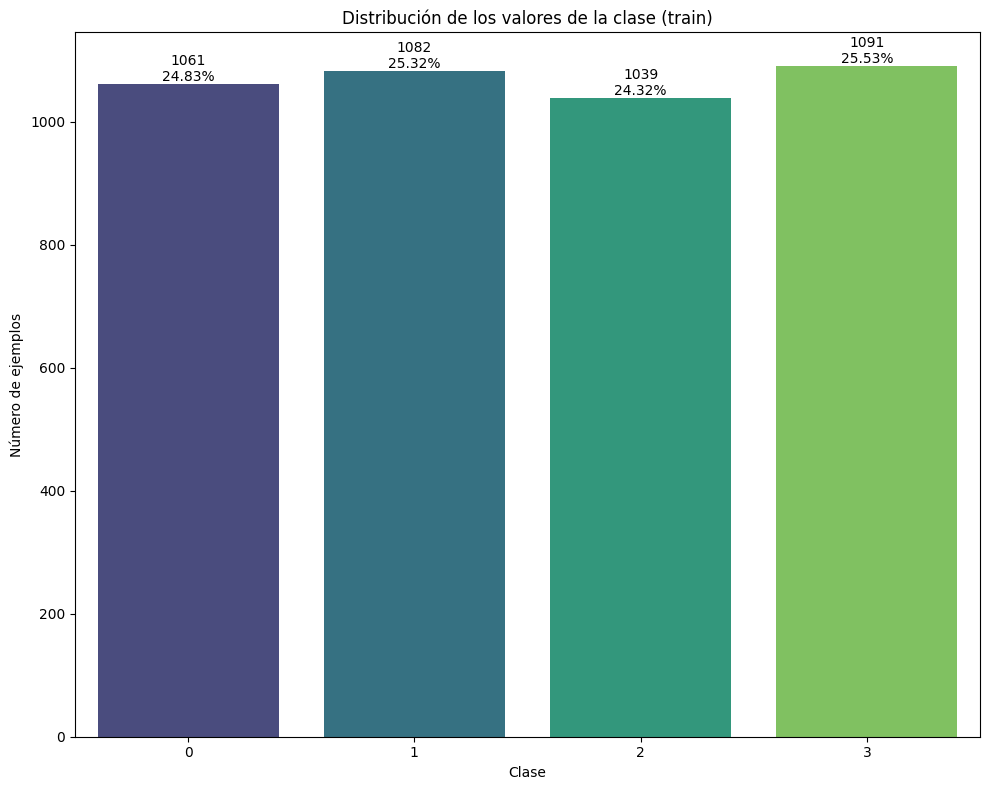

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x=y_train, palette='viridis', ax=ax)
ax.set_title("Distribución de los valores de la clase (train)")
ax.set_xlabel("Clase")
ax.set_ylabel("Número de ejemplos")

total = len(y_train)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}\n{height/total*100:.2f}%",
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Distribución de Clases**

El análisis de la distribución de clases en el conjunto de entrenamiento (`y_train`) revela un excelente balance. Las cuatro clases (0, 1, 2, 3), que representan las diferentes direcciones de las flechas, tienen un número de ejemplos muy similar. Cada clase constituye aproximadamente el 25% del total de ejemplos, con variaciones mínimas entre ellas.

Esta distribución equilibrada es altamente favorable para el desarrollo de modelos de aprendizaje automático, ya que reduce la probabilidad de que el modelo se incline o sesgue hacia una clase mayoritaria. Esto significa que no será necesario aplicar técnicas adicionales de balanceo de clases (como el sobremuestreo o submuestreo), lo que simplifica el proceso de preprocesamiento y asegura que el modelo pueda aprender a distinguir entre todas las clases de manera efectiva.

##**histograma**

para cada una de las 64 características (píxeles) en el DataFrame `X_train`, ajustando el tamaño de la figura para que todos los histogramas sean legibles.

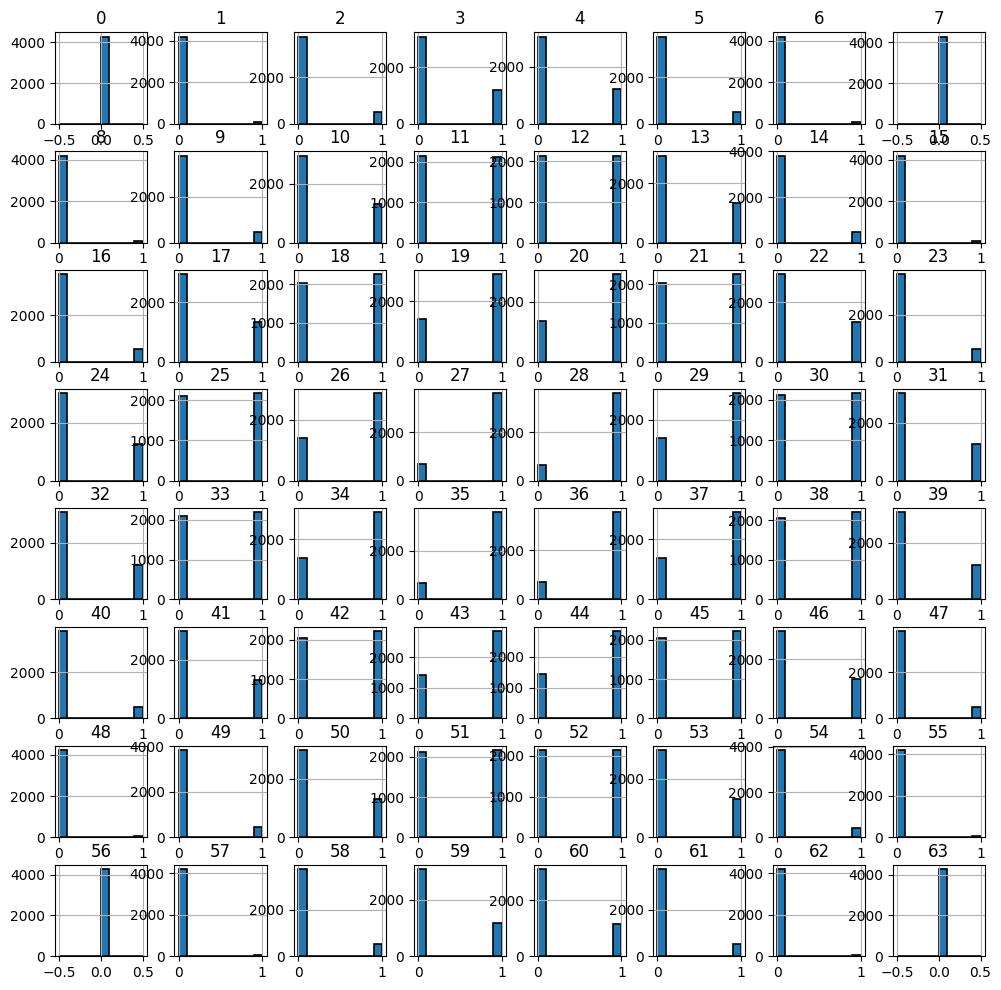

In [15]:
# Genera histogramas para cada característica (columna) en el DataFrame X_train.
# 'edgecolor' y 'linewidth' son para la estética de los bordes de las barras.
X_train.hist(edgecolor='black', linewidth=1.2)

# Obtiene la figura actual de matplotlib. Esto es necesario para ajustar su tamaño.
fig = plt.gcf()

# Establece el tamaño de la figura en pulgadas. En este caso, 12x12 pulgadas.
# Esto es importante para que todos los histogramas de las 64 características sean legibles.
fig.set_size_inches(12, 12)

# Muestra la figura con todos los histogramas.
plt.show()

**Análisis de Histogramas de Píxeles**

Los histogramas individuales para cada una de las 64 características (píxeles) reafirman lo observado en `X_train.describe()`:

*   **Distribución Bimodal:** Como era de esperar para datos binarios, la mayoría de los histogramas muestran una distribución bimodal, con barras en 0 y 1. La altura relativa de estas barras indica la frecuencia de cada estado (apagado/encendido) para ese píxel específico.
*   **Píxeles Consistentes:** Algunos histogramas muestran una barra muy alta en 0 y una pequeña en 1 (o viceversa), lo que significa que esos píxeles son en su mayoría 'apagados' o 'encendidos' en casi todas las imágenes. Estos píxeles podrían corresponder a áreas de la imagen que rara vez cambian, como los bordes de la cuadrícula 8x8.
*   **Píxeles Informativos:** Otros histogramas tienen barras más equilibradas para 0 y 1, indicando que estos píxeles son más activos y variables, lo que los convierte en candidatos para portar más información sobre la dirección de la flecha.

##**Matriz de correlación**

para `X_train` y visualizarla utilizando un mapa de calor de `seaborn`.

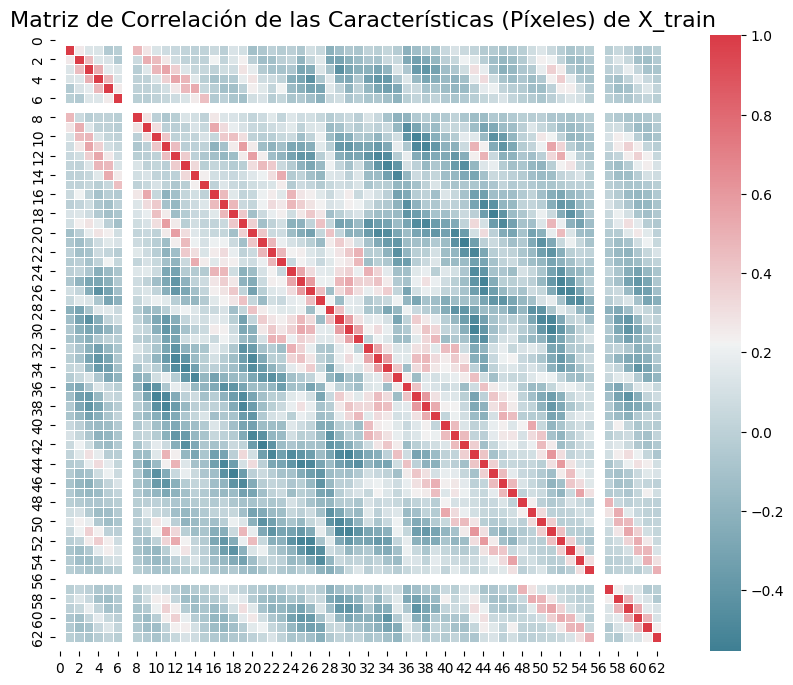

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de correlación
correlation_matrix = X_train.corr()

# Configurar el tamaño de la figura para una mejor visualización
f, ax = plt.subplots(figsize=(10, 8))

# Crear el mapa de calor con los colores y enmascaramiento especificados
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de las Características (Píxeles) de X_train', fontsize=16)

# Mostrar el mapa de calor
plt.show()

**Análisis de la Matriz de Correlación**

La matriz de correlación muestra que varios píxeles presentan **relaciones lineales fuertes**, especialmente entre aquellos que están próximos en la imagen, lo que indica **redundancia de información**. También se observan áreas con **baja o nula correlación**, propias de píxeles lejanos o sin relación visual directa. En general, esta estructura confirma que los píxeles no son completamente independientes, por lo que resulta conveniente aplicar técnicas de **reducción de dimensionalidad** como **PCA** para optimizar el procesamiento y mejorar el desempeño de los modelos de aprendizaje supervisado.


## **Análisis de Componentes Principales (PCA)**

este código te permite aplicar PCA para reducir la dimensionalidad de tus imágenes (de 64 píxeles a un número menor de componentes principales) y te ayuda a decidir cuántas componentes necesitas para mantener la mayor parte de la información (varianza) de tus datos.

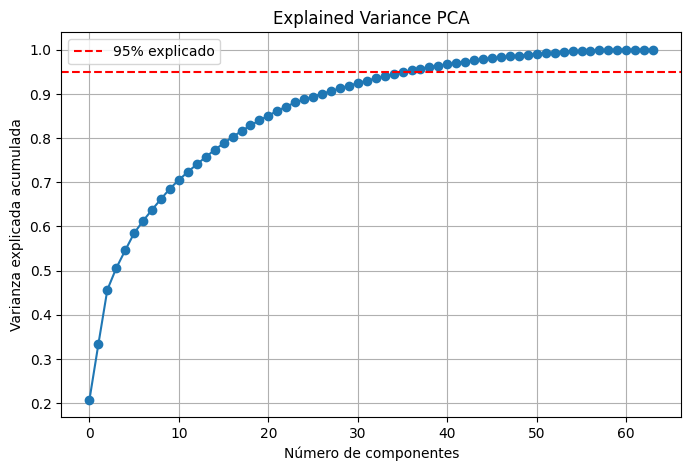

Componentes necesarios para 95% de varianza: 37


In [17]:
from sklearn.decomposition import PCA

# PCA sobre X_train (DataFrame)
pca = PCA()
X_train_PCA_array = pca.fit_transform(X_train)

# Varianza explicada acumulada y plot
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(cumsum, marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% explicado')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Explained Variance PCA')
plt.grid(True)
plt.legend()
plt.show()

# Opcional: número mínimo de componentes para explicar 95% de la varianza
n_comp_95 = np.searchsorted(cumsum, 0.95) + 1
print(f"Componentes necesarios para 95% de varianza: {n_comp_95}")

# Guardar resultado en DataFrame usando el índice de entrenamiento existente
X_train_PCA = pd.DataFrame(data=X_train_PCA_array, index=X_train.index)

**Análisis del Resultado de PCA (37 Componentes para 95% de Varianza)**

El análisis de Componentes Principales (PCA) reveló que se requieren **37 componentes principales para explicar el 95% de la varianza total** presente en los datos originales de 64 píxeles de las imágenes de flechas. Este es un hallazgo significativo con varias implicaciones:

*   **Gran Potencial de Reducción de Dimensionalidad:** De las 64 características originales (píxeles), hemos podido reducir la representación a 37 componentes, conservando una porción muy alta de la información original (95%). Esto representa una reducción de aproximadamente el 42% en la dimensionalidad.

*   **Eficiencia Computacional Mejorada:** Trabajar con 37 características en lugar de 64 puede llevar a una mejora sustancial en la eficiencia computacional de cualquier modelo de aprendizaje automático que se entrene posteriormente. Menos características significan menos cálculos, lo que acelera el entrenamiento y la inferencia.

*   **Simplificación del Modelo y Reducción del Sobreajuste:** Al enfocarse en las componentes que capturan la mayor varianza, se está extrayendo la información más relevante de los datos y eliminando ruido o características menos importantes. Esto puede resultar en modelos más simples, más robustos y con menor riesgo de sobreajuste, especialmente en datasets con alta correlación entre variables.

*   **Preservación de Información Crucial:** La capacidad de reconstruir el 95% de la varianza con solo 37 componentes sugiere que la información crítica para distinguir entre las flechas se ha mantenido eficazmente. Esto se corroborará con la visualización de imágenes reconstruidas.

En resumen, el PCA ofrece una estrategia muy efectiva para optimizar el conjunto de datos, preparándolo para un modelado más eficiente y potencialmente más preciso.

Análisis de varianza utilizando los componentes reales disponibles del PCA ya ajustado.

Componentes disponibles en el PCA: 64
Varianza explicada por los 64 componentes disponibles: 1.000000 (100.00%)

Componentes necesarios para alcanzar 90%: 27
Componentes necesarios para alcanzar 95%: 37
Componentes necesarios para alcanzar 99%: 51


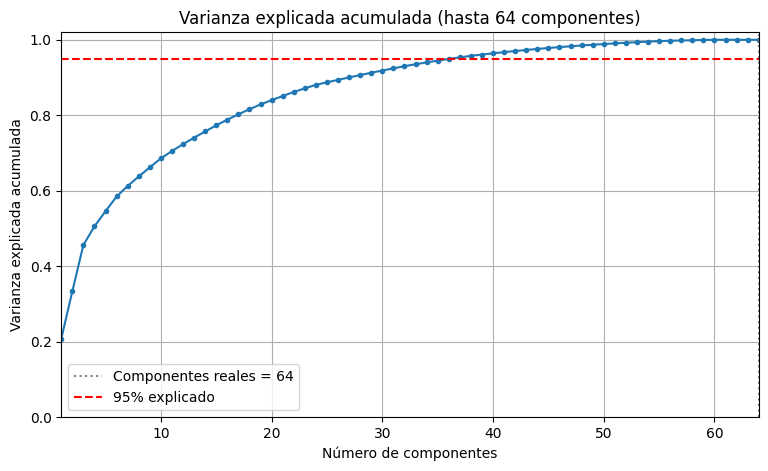

In [18]:
# 'avail' es el número real de componentes disponibles, que es 64 para tus imágenes 8x8.
avail = len(pca.explained_variance_ratio_)
explained = pca.explained_variance_ratio_

print(f"Componentes disponibles en el PCA: {avail}")
print(f"Varianza explicada por los {avail} componentes disponibles: {explained.sum():.6f} ({explained.sum()*100:.2f}%)\n")

# Usar la varianza explicada acumulada directamente de los componentes reales
cumsum = np.cumsum(explained)

def comps_for_threshold(th):
    idx = np.searchsorted(cumsum, th) + 1
    return idx if idx <= avail else None

for thresh in (0.90, 0.95, 0.99):
    idx = comps_for_threshold(thresh)
    if idx is None:
        print(f"No se alcanza {int(thresh*100)}% con {avail} componentes.")
    else:
        print(f"Componentes necesarios para alcanzar {int(thresh*100)}%: {idx}")

# Visualización: varianza explicada acumulada
plt.figure(figsize=(9,5))
x = np.arange(1, avail + 1) # x ahora va hasta el número real de componentes
plt.plot(x, cumsum, marker='.', markevery=max(1, avail//100)) # Usar cumsum sin padding
plt.axvline(avail, color='gray', linestyle=':', label=f'Componentes reales = {avail}')
plt.axhline(0.95, color='red', linestyle='--', label='95% explicado')
plt.xlim(1, avail) # Limitar x a los componentes reales
plt.ylim(0, 1.02)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title(f'Varianza explicada acumulada (hasta {avail} componentes)')
plt.grid(True)
plt.legend()
plt.show()


**Análisis de Varianza con Componentes PCA**

Este análisis demuestra que para tus imágenes binarias de flechas 8x8:

*   **Componentes Disponibles:** Se han extraído 64 componentes principales, que en conjunto explican el 100% de la varianza de los datos originales.

*   **Potencial de Reducción Significativo:** Existe un potencial muy alto para reducir la dimensionalidad de 64 a un número mucho menor sin perder una cantidad considerable de información relevante:
    *   Se necesitan **27 componentes** para explicar el **90%** de la varianza.
    *   Se necesitan **37 componentes** para explicar el **95%** de la varianza.
    *   Se necesitan **51 componentes** para explicar el **99%** de la varianza.

*   **Eficiencia Mejorada:** Reducir la dimensionalidad a, por ejemplo, 37 componentes (para el 95% de la varianza) puede llevar a una mayor eficiencia computacional en modelos posteriores. Esto significa que los modelos se entrenarán y predecirán más rápido, lo cual es una ventaja significativa.

*   **Simplificación del Modelo:** Concentrarse en las componentes que capturan la mayor varianza ayuda a simplificar los modelos y puede reducir el riesgo de sobreajuste, al enfocarse en las características más importantes de los datos.

##**Porcentaje de varianza capturada por los primeros K componentes (usa pca ya ajustado)**

In [19]:

importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_).T

avail = importanceOfPrincipalComponents.shape[1]
for k in (20, 50, 55, 59, 63):
    used = min(k, avail)
    var_sum = importanceOfPrincipalComponents.loc[:, 0:used-1].sum(axis=1).values[0]
    if k > avail:
        print(f"Varianza capturada por los primeros {k} componentes (solo {avail} disponibles): "
              f"{var_sum:.6f} ({var_sum*100:.2f}%)")
    else:
        print(f"Varianza capturada por los primeros {k} componentes: {var_sum:.6f} ({var_sum*100:.2f}%)")

Varianza capturada por los primeros 20 componentes: 0.839987 (84.00%)
Varianza capturada por los primeros 50 componentes: 0.988660 (98.87%)
Varianza capturada por los primeros 55 componentes: 0.996403 (99.64%)
Varianza capturada por los primeros 59 componentes: 0.999424 (99.94%)
Varianza capturada por los primeros 63 componentes: 1.000000 (100.00%)


##**PCA**

In [20]:
def scatter_plot(xDF, yDF, algoName, col1=0, col2=1, annotate=False):
    # Obtener el número total de características (columnas) en xDF
    n_feat = xDF.shape[1]
    # Verificar que los índices de las columnas solicitadas estén dentro del rango válido
    if not (0 <= col1 < n_feat and 0 <= col2 < n_feat):
        raise ValueError(f"Column indices fuera de rango: X tiene {n_feat} columnas (0..{n_feat-1})")

    # Crear un DataFrame temporal con las dos columnas seleccionadas de xDF
    # y asegurar que el índice sea compatible con yDF
    tempDF = pd.DataFrame(data=xDF.loc[:, [col1, col2]], index=xDF.index)
    # Concatenar las etiquetas (yDF) al DataFrame temporal, renombrándolas como 'Label'
    tempDF = pd.concat((tempDF, yDF.rename("Label")), axis=1, join="inner")

    # Crear nombres descriptivos para las columnas del DataFrame temporal para los ejes X e Y
    v1 = f"Vector_{col1}"
    v2 = f"Vector_{col2}"
    tempDF.columns = [v1, v2, "Label"]

    # Configurar el gráfico de dispersión
    fig, ax = plt.subplots(figsize=(8, 6))
    # Usar seaborn para crear el scatter plot, coloreando por 'Label'
    sns.scatterplot(x=v1, y=v2, hue="Label", data=tempDF, palette="viridis", ax=ax, s=40, alpha=0.85)

    # Establecer el título del gráfico
    ax.set_title("Separation of Observations using " + str(algoName))
    # Establecer las etiquetas de los ejes
    ax.set_xlabel(v1)
    ax.set_ylabel(v2)
    # Habilitar la cuadrícula para una mejor visualización
    ax.grid(True)

    # Si se solicita, anotar los centroides de cada clase
    if annotate:
        # Calcular el centroide (media) para cada 'Label' en las dos columnas seleccionadas
        centroids = tempDF.groupby("Label")[[v1, v2]].mean()
        # Iterar sobre cada centroide y anotarlo en el gráfico
        for lbl, row in centroids.iterrows():
            ax.annotate(str(int(lbl)), xy=(row[v1], row[v2]), # Posición de la anotación
                        xytext=(5, 5), textcoords='offset points', # Desplazamiento del texto
                        fontsize=11, fontweight='bold', # Estilo del texto
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8)) # Estilo del cuadro de la anotación

    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()
    # Retornar la figura y los ejes para posibles modificaciones externas
    return fig, ax

Aplicar PCA a datos de prueba y validacion

In [21]:
from sklearn.preprocessing import StandardScaler

print("--- Aplicando PCA y Escalado a conjuntos de Validación y Prueba ---")

# Transformar x_val y x_test usando el objeto PCA ya ajustado en x_train
# Asegurarse de que x_val_flat y x_test_flat estén definidos.
# Si no lo están, se deben crear aquí, asumiendo una forma (n_samples, 8, 8, 1).
if 'x_val_flat' not in globals():
    x_val_flat = x_val.reshape((x_val.shape[0], -1))
if 'x_test_flat' not in globals():
    x_test_flat = x_test.reshape((x_test.shape[0], -1))

X_val_PCA_array = pca.transform(x_val_flat)
X_test_PCA_array = pca.transform(x_test_flat)

# Convertir a DataFrame, manteniendo índices si es relevante (para X_val_PCA, X_test_PCA)
# Para la escala, usaremos los arrays directamente.
X_val_PCA = pd.DataFrame(data=X_val_PCA_array)
X_test_PCA = pd.DataFrame(data=X_test_PCA_array)

print(f"X_val_PCA shape: {X_val_PCA.shape}")
print(f"X_test_PCA shape: {X_test_PCA.shape}")

# Escalar los datos de PCA
scaler = StandardScaler()

# Ajustar el escalador solo con los datos de entrenamiento (X_train_PCA)
X_train_PCA_scaled = scaler.fit_transform(X_train_PCA)

# Transformar los datos de validación y prueba con el mismo escalador
X_val_PCA_scaled = scaler.transform(X_val_PCA)
X_test_PCA_scaled = scaler.transform(X_test_PCA)

# Convertir los arrays escalados a DataFrames para consistencia si es necesario en pasos posteriores
X_train_PCA_scaled = pd.DataFrame(data=X_train_PCA_scaled, index=X_train_PCA.index)
X_val_PCA_scaled = pd.DataFrame(data=X_val_PCA_scaled, index=X_val_PCA.index)
X_test_PCA_scaled = pd.DataFrame(data=X_test_PCA_scaled, index=X_test_PCA.index)

print("Escalado completado para X_train_PCA, X_val_PCA, X_test_PCA.")
print(f"X_train_PCA_scaled shape: {X_train_PCA_scaled.shape}")
print(f"X_val_PCA_scaled shape: {X_val_PCA_scaled.shape}")
print(f"X_test_PCA_scaled shape: {X_test_PCA_scaled.shape}")
print("----------------------------------------------------")

--- Aplicando PCA y Escalado a conjuntos de Validación y Prueba ---
X_val_PCA shape: (4038, 64)
X_test_PCA shape: (4076, 64)
Escalado completado para X_train_PCA, X_val_PCA, X_test_PCA.
X_train_PCA_scaled shape: (4273, 64)
X_val_PCA_scaled shape: (4038, 64)
X_test_PCA_scaled shape: (4076, 64)
----------------------------------------------------


esta función es una herramienta visual clave para comprender empíricamente el compromiso entre la reducción de dimensionalidad y la pérdida de información. Te permite ver directamente qué tan bien se parece una imagen reconstruida a su original cuando se utilizan menos características.

**Análisis de la Visualización con `scatter_plot`**

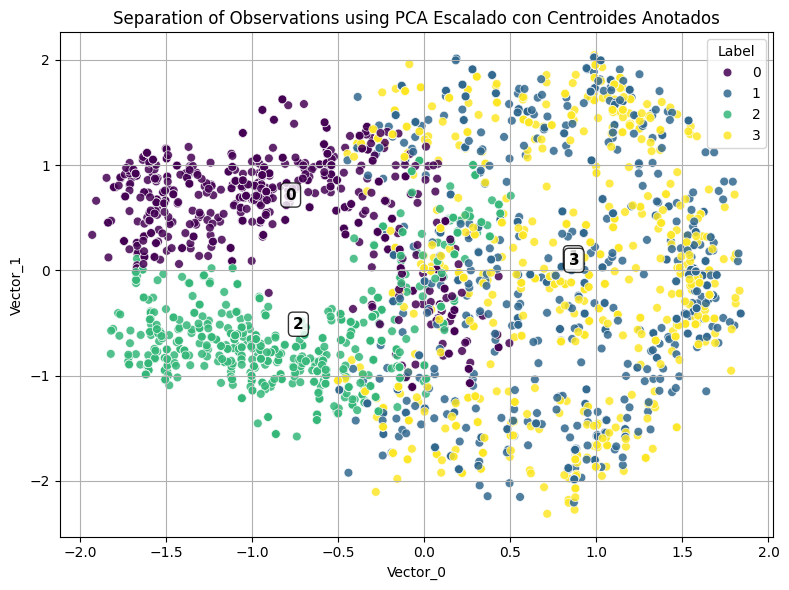

In [22]:
fig, ax = scatter_plot(X_train_PCA_scaled, y_train, "PCA Escalado con Centroides Anotados", col1=0, col2=1, annotate=True)
plt.show()

**Análisis de la Visualización con `scatter_plot`**

La función `scatter_plot` permite visualizar la separación de las clases de flechas en el espacio bidimensional de las dos primeras componentes principales (PC0 y PC1) obtenidas mediante PCA.

**Conclusión del Diagrama:**

Al aplicar `scatter_plot` a `X_train_PCA` y `y_train`:

*   El gráfico de dispersión muestra cada imagen de flecha como un punto, coloreado según su clase (0, 1, 2, 3).
*   La visualización de los centroides anotados y la distribución de los puntos sugieren que las dos primeras componentes principales capturan información relevante para la clasificación, ya que se observa **cierta separación** entre las diferentes clases de flechas. Esto indica que el PCA es útil para identificar características discriminatorias y puede simplificar el modelado posterior sin perder la capacidad de distinguir las clases.

**Visualización de Imágenes Originales vs. Reconstruidas por PCA**

Esta función permite comparar una imagen original con su reconstrucción obtenida a partir de una selección de componentes principales de PCA. Esto ayuda a entender cuánta información se preserva o se pierde con la reducción de dimensionalidad.

Visualizando ejemplos de reconstrucción con 37 componentes (95% de varianza):


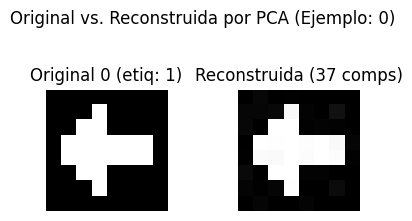

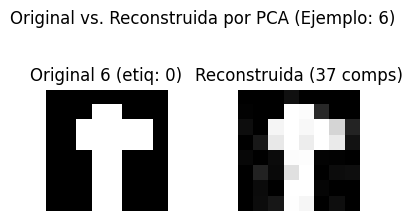


Visualizando un ejemplo con un número menor de componentes (por ejemplo, 5 componentes):


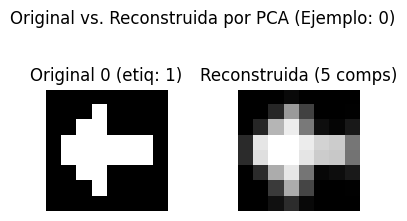

In [23]:
def view_reconstructed_arrow_image(example_idx, n_components_for_reconstruction=None):
    """
    Visualiza una imagen de flecha individual (original y reconstruida por PCA).

    Args:
        example_idx (int): El índice del ejemplo a visualizar en X_train y y_train.
        n_components_for_reconstruction (int, optional): Número de componentes PCA a usar
                                                        para la reconstrucción. Si es None,
                                                        se usarán n_comp_95 (37 componentes)
                                                        como valor predeterminado.
    """
    if example_idx not in y_train.index:
        print(f"Índice {example_idx} no encontrado en y_train. Asegúrese de que el índice exista después de cualquier filtrado.")
        return

    # Imagen Original
    label = y_train.loc[example_idx]
    original_image_flat = X_train.loc[example_idx,:].values
    original_image = original_image_flat.reshape([8,8])

    # Imagen Reconstruida desde PCA
    if n_components_for_reconstruction is None:
        # Usar el número de componentes que explican el 95% de la varianza por defecto
        n_components_to_use = n_comp_95
    else:
        # Asegurarse de no exceder las componentes disponibles
        n_components_to_use = min(n_components_for_reconstruction, pca.n_components_)

    # Obtener el vector transformado por PCA para el ejemplo
    pca_vector = X_train_PCA_array[example_idx, :n_components_to_use]

    # Crear un vector rellenado con ceros para la transformación inversa si se usan menos componentes
    full_pca_vector_for_inverse = np.zeros(pca.n_components_)
    full_pca_vector_for_inverse[:n_components_to_use] = pca_vector

    # Transformación inversa para obtener la imagen reconstruida en el espacio de características original
    reconstructed_image_flat = pca.inverse_transform(full_pca_vector_for_inverse)
    reconstructed_image = reconstructed_image_flat.reshape([8,8])

    fig, axs = plt.subplots(1, 2, figsize=(4, 2)) # Dos subplots para la comparación

    # Graficar Original
    axs[0].imshow(original_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    axs[0].set_title(f"Original {example_idx} (etiq: {label})")
    axs[0].axis('off')

    # Graficar Reconstruida
    axs[1].imshow(reconstructed_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    axs[1].set_title(f"Reconstruida ({n_components_to_use} comps)")
    axs[1].axis('off')

    plt.suptitle(f"Original vs. Reconstruida por PCA (Ejemplo: {example_idx})", y=1.08)
    plt.tight_layout()
    plt.show()

# Ejemplos de uso (puedes cambiar los índices o el número de componentes):
print("Visualizando ejemplos de reconstrucción con 37 componentes (95% de varianza):")
view_reconstructed_arrow_image(0)
view_reconstructed_arrow_image(6)

print("\nVisualizando un ejemplo con un número menor de componentes (por ejemplo, 5 componentes):")
view_reconstructed_arrow_image(0, n_components_for_reconstruction=5)


##**Histogramas utilizando los datos transformados por PCA (X_train_PCA)**

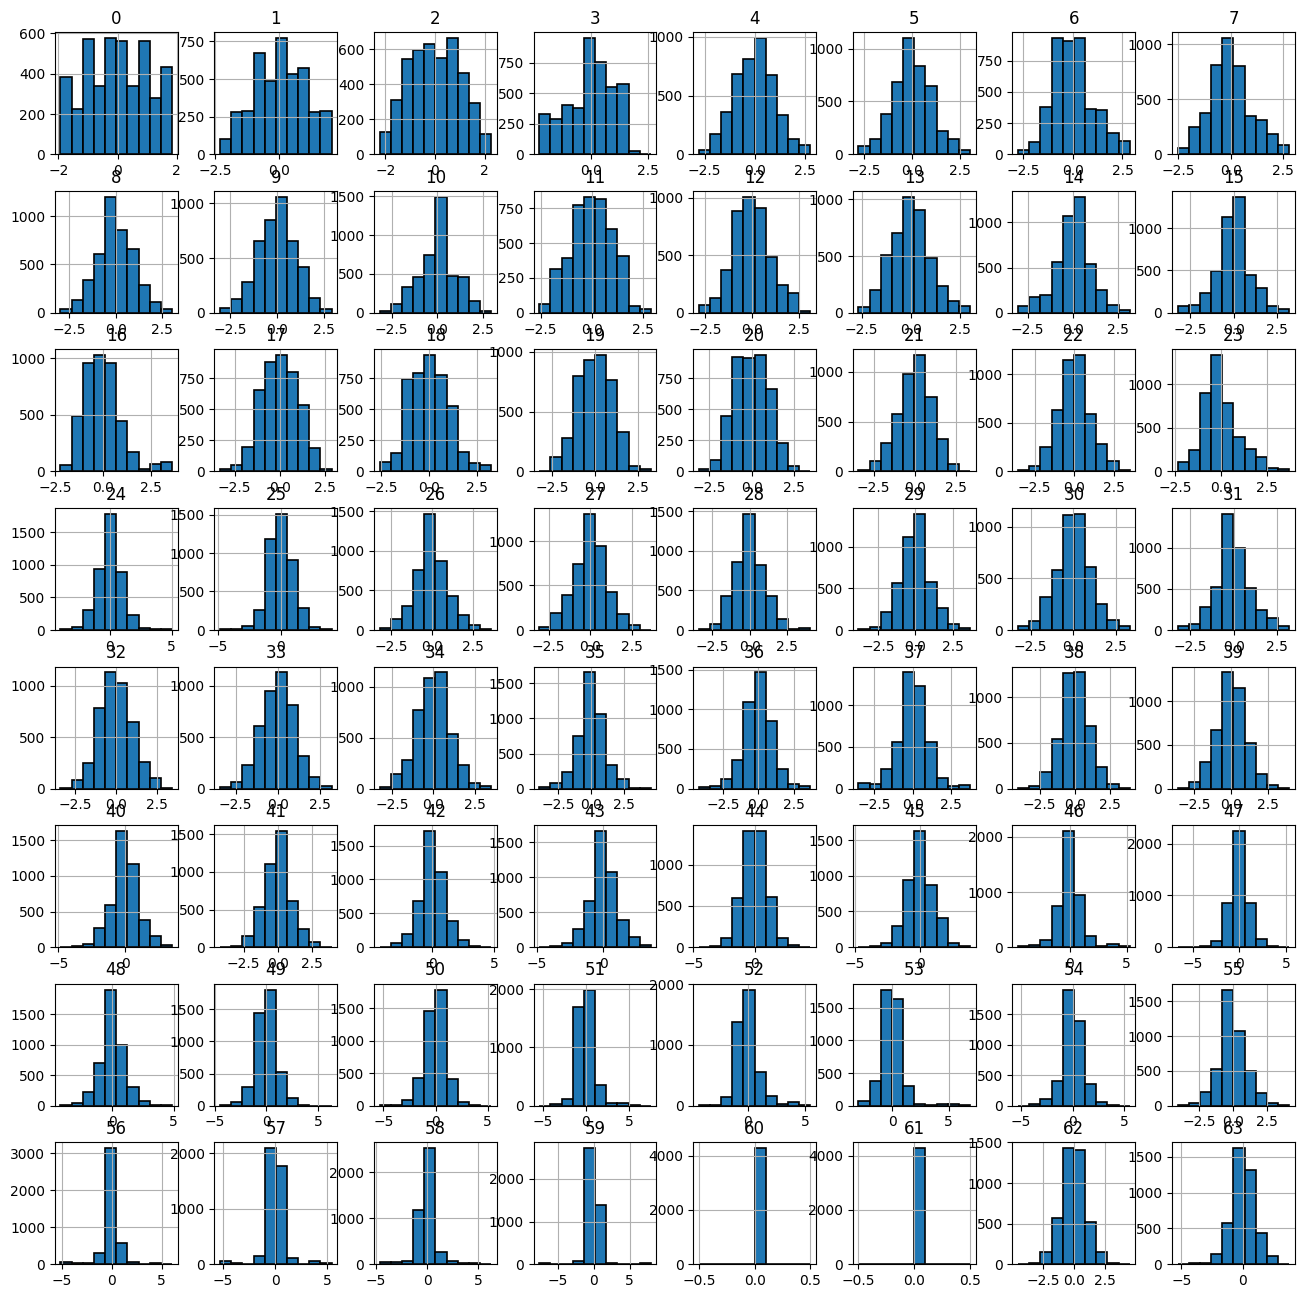

In [24]:
# Genera histogramas para cada componente principal en el DataFrame X_train_PCA.
# 'edgecolor' y 'linewidth' son para la estética de los bordes de las barras.
X_train_PCA_scaled.hist(edgecolor='black', linewidth=1.2)

# Obtiene la figura actual de matplotlib. Esto es necesario para ajustar su tamaño.
fig = plt.gcf()

# Establece el tamaño de la figura en pulgadas para que todos los histogramas sean legibles.
# Se ajusta para 64 componentes.
fig.set_size_inches(16, 16)

# Muestra la figura con todos los histogramas.
plt.show()

**Histogramas tras la aplicación del PCA**

se observa que las distribuciones se concentran cerca del cero, con algunos componentes mostrando valores casi constantes.
Esto significa que el PCA logró reducir la dimensionalidad reteniendo solo los componentes más relevantes, mientras que los demás aportan muy poca varianza o información.

Interpretación: los nuevos componentes están descorrelacionados, y solo unos pocos concentran la mayor parte de la información útil.

El PCA transformó las variables originales en un conjunto de componentes ortogonales donde la mayoría de la varianza se concentra en los primeros.
Esto permite:

Reducir la cantidad de variables sin perder información relevante.

Simplificar el modelo y mejorar su rendimiento.

Eliminar redundancia y ruido en los datos.

##**Matriz de correlación utilizando los datos transformados por PCA (X_train_PCA)**

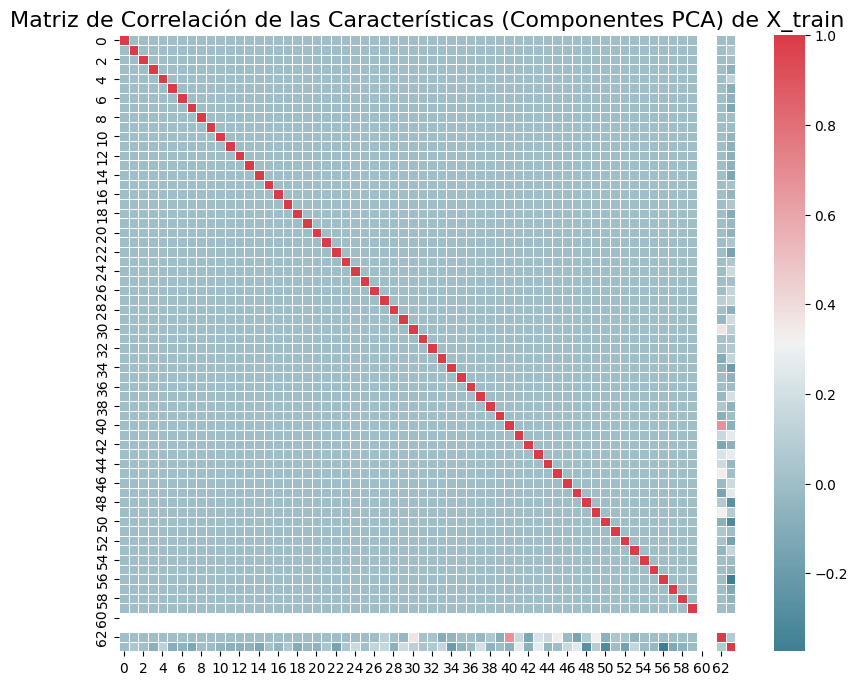

In [25]:
# Calcular la matriz de correlación de los datos transformados por PCA
# Se usa X_train_PCA que contiene los componentes principales
correlation_matrix_pca = X_train_PCA_scaled.corr()

# Configurar el tamaño de la figura para una mejor visualización
f, ax = plt.subplots(figsize=(10, 8))

# Crear el mapa de calor con los colores y enmascaramiento especificados
sns.heatmap(correlation_matrix_pca, mask=np.zeros_like(correlation_matrix_pca, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de las Características (Componentes PCA) de X_train', fontsize=16)

# Mostrar el mapa de calor
plt.show()

La matriz de correlación de las características transformadas por PCA muestra una fuerte independencia entre los componentes, evidenciada por la ausencia de correlaciones fuera de la diagonal principal. Esto confirma que el PCA logró eliminar la multicolinealidad presente en los datos originales, generando nuevas variables ortogonales (no correlacionadas) que concentran la mayor parte de la varianza. Gracias a esto, se obtiene una representación más compacta y eficiente de los datos, ideal para mejorar el rendimiento y la estabilidad de los modelos de aprendizaje supervisado.

# Estrategias de Preparación de Datos

A continuación, se detallan las estrategias de preparación de datos implementadas en este cuaderno para el problema de clasificación de flechas de 8x8 píxeles:

1.  **Conversión de Imágenes a Vectores Aplanados**: Las imágenes originales, que se encontraban en un formato 8x8x1 (alto, ancho, canales), fueron transformadas en vectores aplanados de 64 píxeles. Esto se logró al convertir cada imagen en una secuencia lineal de sus valores de píxeles, donde cada píxel (0 o 1) se convierte en una característica numérica. Esta transformación es esencial para la aplicación de muchos algoritmos de Machine Learning tradicionales.

2.  **Verificación y Manejo de Valores Faltantes**: Se realizó una verificación exhaustiva para detectar la presencia de valores nulos (NaN) o faltantes en el conjunto de datos `X_train` (y sus equivalentes de validación y prueba). Se confirmó que **no existían valores faltantes** en ninguna de las características. Por lo tanto, no fue necesario aplicar ninguna técnica de imputación o eliminación de filas/columnas debido a datos incompletos.

3.  **Eliminación de Imágenes Anómalas (Completamente de Ceros)**: Al inicio del preprocesamiento, se identificó y eliminó una única imagen del conjunto de entrenamiento que estaba completamente compuesta por ceros. Este tipo de imagen no aporta información útil para la clasificación y podría introducir ruido o sesgos en el modelo.

4.  **Balanceo del Conjunto de Datos**: Se analizó la distribución de las cuatro clases de flechas (0, 1, 2, 3) en el conjunto de entrenamiento. Se observó que las clases estaban **equitativamente distribuidas**, con un número muy similar de ejemplos por cada categoría. Gracias a esta distribución balanceada, no fue necesario aplicar técnicas adicionales de balanceo de clases (como sobremuestreo o submuestreo).

5.  **Reducción de Dimensionalidad con PCA**: Para optimizar el rendimiento computacional y evitar posibles problemas de la 'maldición de la dimensionalidad', se aplicó el Análisis de Componentes Principales (PCA). Tras un análisis de la varianza explicada, se determinó que **37 componentes principales** son suficientes para retener el **95% de la varianza total** de los datos originales. Esta reducción de 64 a 37 características permite trabajar con un conjunto de datos más compacto sin una pérdida significativa de información relevante.

6.  **Escalado de Características con StandardScaler**: Finalmente, después de la aplicación de PCA, se utilizó `StandardScaler` para escalar las características (los componentes principales). Este escalado transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esta estandarización es crucial para algoritmos que son sensibles a la escala de las características (como los modelos basados en distancias o gradientes) y mejora la velocidad y estabilidad de convergencia de los modelos de Machine Learning.

## Justificación del Análisis


### 1. Histogramas de Píxeles: Naturaleza Binaria y Distribución de Información
Los histogramas individuales para cada una de las 64 características (píxeles) en el `X_train` original confirmaron la naturaleza binaria de las imágenes (valores de 0 o 1). Estos histogramas mostraron distribuciones bimodales, indicando claramente la frecuencia de píxeles 'apagados' (0) o 'encendidos' (1). Este análisis fue fundamental para comprender que los datos eran discretos y no continuos, lo cual es crucial para la selección de modelos y la interpretación de resultados. Además, la observación de que algunos píxeles presentaban barras más equilibradas (0 y 1 con frecuencias similares) mientras otros eran casi exclusivamente 0 o 1, justificó la búsqueda de técnicas de reducción de dimensionalidad como PCA, ya que los píxeles con baja variabilidad aportan menos información discriminatoria.

### 2. Matrices de Correlación: Justificación y Efectividad de PCA
La **matriz de correlación** de los píxeles originales en `X_train` reveló la existencia de fuertes correlaciones lineales entre píxeles adyacentes. Esta redundancia de información es común en datos de imagen y justifica la aplicación de PCA. Al aplicar PCA, se buscó transformar estas características correlacionadas en un nuevo conjunto de componentes principales ortogonales (no correlacionados). La **matriz de correlación post-PCA** (de `X_train_PCA`) demostró la efectividad de esta estrategia, mostrando una clara independencia entre los componentes. Esto eliminó la multicolinealidad, lo que es beneficioso para la estabilidad y el rendimiento de muchos modelos de aprendizaje automático.

### 3. Varianza Explicada Acumulada por PCA: Elección de Componentes Principales
El gráfico de **varianza explicada acumulada por PCA** fue clave para determinar el número óptimo de componentes principales a retener. Este análisis mostró que se requerían **37 componentes principales para explicar el 95% de la varianza total** presente en los datos originales de 64 píxeles. Esta visualización proporcionó una justificación empírica sólida para reducir la dimensionalidad de 64 a 37 características, asegurando que se conservaba una cantidad significativa de información relevante (el 95%) mientras se lograba una reducción de dimensionalidad del 42%. Esta reducción tiene un impacto directo en la eficiencia computacional y en la mitigación del sobreajuste.

### 4. Visualización de Imágenes Originales y Reconstruidas por PCA: Preservación de la Información Visual
La comparación visual entre las **imágenes originales y sus reconstrucciones a partir de los componentes principales de PCA** demostró empíricamente la preservación de la información visual. Al reconstruir imágenes utilizando, por ejemplo, los 37 componentes que explicaban el 95% de la varianza, se pudo observar que las flechas reconstruidas eran casi idénticas a las originales. Incluso con un número menor de componentes (ej. 5), la forma general de la flecha era a menudo discernible. Esta visualización fue crucial para validar que la reducción de dimensionalidad no implicaba una pérdida inaceptable de la información esencial para la tarea de clasificación de flechas.

# **ENTRENAMIENTOS Y PRUEBAS**

##Regresión SoftMax (Clasificación Multiclase)

Vamos a aplicar un modelo de **Regresión Logística Multinomial** (conocido también como SoftMax Regression) a nuestros datos. Este modelo es adecuado para problemas de clasificación multiclase como el nuestro (4 clases de flechas). Previamente, escalaremos las características para mejorar el rendimiento del optimizador.


Mejora de Parámetros: Búsqueda de Hiperparámetros con `GridSearchCV`

Vamos a utilizar `GridSearchCV` para encontrar la mejor combinación de hiperparámetros para nuestro modelo `LogisticRegression`.

**Parámetros a Optimizar:**

*   **`C`**: Inverso de la fuerza de regularización. Valores más pequeños indican una regularización más fuerte.
*   **`penalty`**: Tipo de regularización ('l1', 'l2', 'elasticnet', 'none').
*   **`solver`**: Algoritmo a usar en el problema de optimización. Se debe seleccionar un `solver` compatible con el tipo de `penalty`.

Se recomienda usar los datos escalados (`X_train_scaled`, `y_train`) para el proceso de búsqueda.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
import time # Importar la librería time

warnings.filterwarnings('ignore', category=FutureWarning) # Ignorar FutureWarnings de sklearn

In [27]:
print("--- Optimización de Hiperparámetros con GridSearchCV (sobre PCA escalado) ---")

# Definir el modelo base
# Se inicializa con multi_class='multinomial' y max_iter para compatibilidad con la búsqueda.
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000, random_state=42, n_jobs=-1) # Usar 'saga' para compatibilidad con l1/l2 y elasticnet

# Definir el rango de hiperparámetros a buscar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'], # 'elasticnet' y 'none' también podrían incluirse con 'saga'
    'solver': ['saga'] # 'saga' es compatible con 'l1', 'l2' y 'elasticnet'
}

# Configurar GridSearchCV
# cv=5 indica validación cruzada de 3 folds
# scoring='accuracy' indica que la métrica de evaluación es la precisión
# n_jobs=-1 usa todos los núcleos de CPU disponibles
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Registrar el tiempo de inicio
start_time = time.time()

# Asegurar que y_train tiene el mismo número de muestras y el mismo índice que X_train
y_train = y_train.loc[X_train_PCA_scaled.index]

# Realizar la búsqueda en los datos PCA de entrenamiento escalados
grid_search.fit(X_train_PCA_scaled, y_train)

# Registrar el tiempo de finalización
end_time = time.time()

# Calcular y imprimir la duración del entrenamiento
training_duration = end_time - start_time
print(f"Duración del entrenamiento de GridSearchCV para SoftMax: {training_duration:.2f} segundos")

print("Búsqueda de hiperparámetros completada (sobre características PCA escaladas).")
print("----------------------------------------------------")

--- Optimización de Hiperparámetros con GridSearchCV (sobre PCA escalado) ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Duración del entrenamiento de GridSearchCV para SoftMax: 25.09 segundos
Búsqueda de hiperparámetros completada (sobre características PCA escaladas).
----------------------------------------------------


Resultados de la Búsqueda de Hiperparámetros

Ahora, mostraremos los mejores parámetros encontrados y la precisión media obtenida con esos parámetros.

In [28]:
print("--- Mejores Parámetros Encontrados ---")
print(f"Mejor puntuación (accuracy): {grid_search.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_softReg = grid_search.best_estimator_

print("\nModelo final entrenado con los mejores parámetros encontrados.")
print("----------------------------------------------------")

--- Mejores Parámetros Encontrados ---
Mejor puntuación (accuracy): 0.9558
Mejores parámetros: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}

Modelo final entrenado con los mejores parámetros encontrados.
----------------------------------------------------


**Evaluación del Modelo**

Finalmente, evaluaremos el rendimiento del modelo con los mejores parámetros encontrados en los conjuntos de entrenamiento, validación y prueba para ver la mejora.

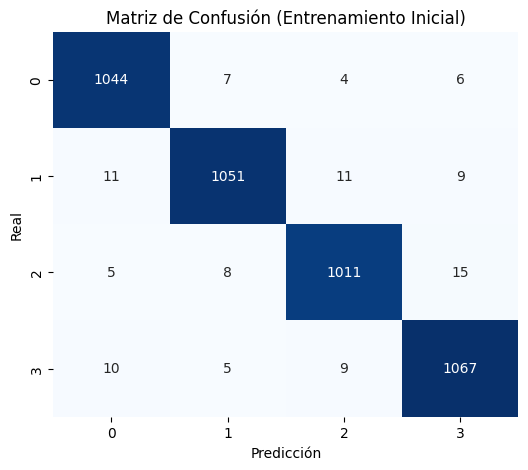

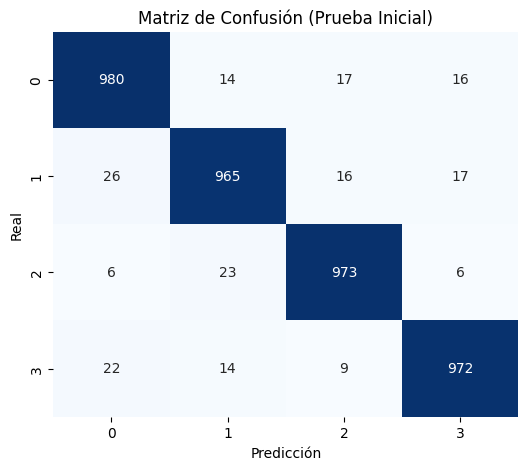

In [29]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_heatmap(y_true, y_pred, title, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Obtener las clases únicas para las etiquetas
# Asumimos que las clases son 0, 1, 2, 3 por la descripción del problema
class_names = sorted(y_train.unique())

# Generar predicciones para cada conjunto de datos
y_train_pred_tuned = best_softReg.predict(X_train_PCA_scaled)

y_test_pred_tuned = None
# Check if X_test_PCA_scaled and y_test are available globally
if 'X_test_PCA_scaled' in globals() and X_test_PCA_scaled is not None and 'y_test' in globals():
    y_test_pred_tuned = best_softReg.predict(X_test_PCA_scaled)

# Matriz de Confusión para el conjunto de entrenamiento
plot_confusion_matrix_heatmap(y_train, y_train_pred_tuned,
                              'Matriz de Confusión (Entrenamiento Inicial)', classes=class_names)

# Matriz de Confusión para el conjunto de prueba
if y_test_pred_tuned is not None:
    plot_confusion_matrix_heatmap(y_test, y_test_pred_tuned,
                                  'Matriz de Confusión (Prueba Inicial)', classes=class_names)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("--- Evaluación del Modelo SoftMax Inicial (con PCA Escalado) ---")

# Predicciones y evaluación en el conjunto de entrenamiento
# y_train_pred_tuned ya está definido en la celda anterior
print(f"Precisión en el conjunto de entrenamiento (inicial): {accuracy_score(y_train, y_train_pred_tuned):.4f}")
print("\nReporte de Clasificación (Entrenamiento Inicial):\n")
print(classification_report(y_train, y_train_pred_tuned))

# Predicciones y evaluación en el conjunto de prueba
# y_test_pred_tuned ya está definido en la celda anterior
if 'X_test_PCA_scaled' in globals() and X_test_PCA_scaled is not None and 'y_test' in globals() and y_test_pred_tuned is not None:
    print(f"\nPrecisión en el conjunto de prueba (inicial): {accuracy_score(y_test, y_test_pred_tuned):.4f}")
    print("\nReporte de Clasificación (Prueba Inicial):\n")
    print(classification_report(y_test, y_test_pred_tuned))
else:
    print("\nConjunto de prueba no disponible para evaluación (PCA escalado).")

print("----------------------------------------------------")

--- Evaluación del Modelo SoftMax Inicial (con PCA Escalado) ---
Precisión en el conjunto de entrenamiento (inicial): 0.9766

Reporte de Clasificación (Entrenamiento Inicial):

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1061
           1       0.98      0.97      0.98      1082
           2       0.98      0.97      0.97      1039
           3       0.97      0.98      0.98      1091

    accuracy                           0.98      4273
   macro avg       0.98      0.98      0.98      4273
weighted avg       0.98      0.98      0.98      4273


Precisión en el conjunto de prueba (inicial): 0.9544

Reporte de Clasificación (Prueba Inicial):

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1027
           1       0.95      0.94      0.95      1024
           2       0.96      0.97      0.96      1008
           3       0.96      0.96      0.96      1017

    accuracy     

### **Regresión SoftMax (Clasificación Multiclase) mejorando parametros**

In [31]:
warnings.filterwarnings('ignore', category=FutureWarning) # Ignorar FutureWarnings de sklearn

print("--- Optimización de Hiperparámetros con GridSearchCV (sobre PCA escalado) ---")

# Definir el modelo base
# Se inicializa con multi_class='multinomial' y max_iter para compatibilidad con la búsqueda.
# Usar 'saga' para compatibilidad con l1/l2 y elasticnet
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1500, random_state=42, n_jobs=-1)

# Definir el rango de hiperparámetros a buscar
param_grid = {
    'C': [0.01, 1, 100],
    'penalty': ['l1', 'l2'], # 'elasticnet' y 'none' también podrían incluirse con 'saga'
    'max_iter': [500, 800, 1200],
    'solver': ['lbfgs', 'newton-cg'] # 'saga' es compatible con 'l1', 'l2' y 'elasticnet'
}

# Configurar GridSearchCV
# cv=5 indica validación cruzada de 5 folds
# scoring='accuracy' indica que la métrica de evaluación es la precisión
# n_jobs=-1 usa todos los núcleos de CPU disponibles
grid_search2 = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1, verbose=1)

# Registrar el tiempo de inicio
start_time = time.time()

# Realizar la búsqueda en los datos PCA de entrenamiento escalados
grid_search2.fit(X_train_PCA_scaled, y_train)

# Registrar el tiempo de finalización
end_time = time.time()

# Calcular y imprimir la duración del entrenamiento
training_duration = end_time - start_time
print(f"Duración del entrenamiento de GridSearchCV para SoftMax: {training_duration:.2f} segundos")

print("Búsqueda de hiperparámetros completada (sobre características PCA escaladas).")
print("----------------------------------------------------")

--- Optimización de Hiperparámetros con GridSearchCV (sobre PCA escalado) ---
Fitting 2 folds for each of 36 candidates, totalling 72 fits


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\pc\AppData\Local\Prog

Duración del entrenamiento de GridSearchCV para SoftMax: 1.56 segundos
Búsqueda de hiperparámetros completada (sobre características PCA escaladas).
----------------------------------------------------


**Resultados de la Búsqueda de Hiperparámetros**

Ahora, mostraremos los mejores parámetros encontrados y la precisión media obtenida con esos parámetros.

In [32]:
print("--- Mejores Parámetros Encontrados ---")
print(f"Mejor puntuación (accuracy): {grid_search2.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search2.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_softReg = grid_search.best_estimator_

print("\nModelo final entrenado con los mejores parámetros encontrados.")
print("----------------------------------------------------")

--- Mejores Parámetros Encontrados ---
Mejor puntuación (accuracy): 0.9523
Mejores parámetros: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

Modelo final entrenado con los mejores parámetros encontrados.
----------------------------------------------------


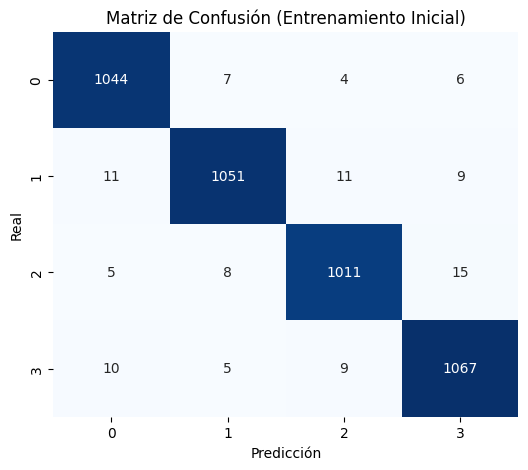

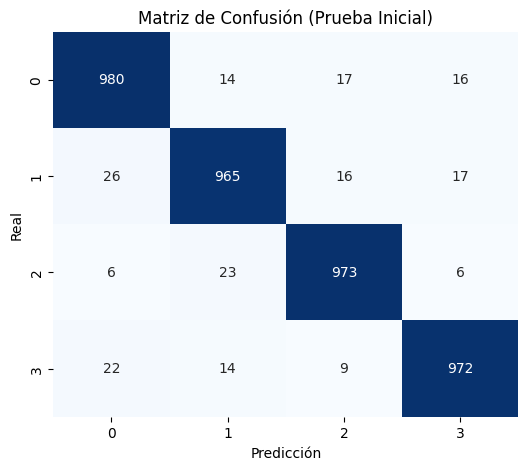

--- Evaluación del Modelo SoftMax Inicial (con PCA Escalado) ---
Precisión en el conjunto de entrenamiento (inicial): 0.9766

Reporte de Clasificación (Entrenamiento Inicial):

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1061
           1       0.98      0.97      0.98      1082
           2       0.98      0.97      0.97      1039
           3       0.97      0.98      0.98      1091

    accuracy                           0.98      4273
   macro avg       0.98      0.98      0.98      4273
weighted avg       0.98      0.98      0.98      4273


Precisión en el conjunto de prueba (inicial): 0.9544

Reporte de Clasificación (Prueba Inicial):

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1027
           1       0.95      0.94      0.95      1024
           2       0.96      0.97      0.96      1008
           3       0.96      0.96      0.96      1017

    accuracy     

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def plot_confusion_matrix_heatmap(y_true, y_pred, title, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Obtener las clases únicas para las etiquetas
# Asumimos que las clases son 0, 1, 2, 3 por la descripción del problema
class_names = sorted(y_train.unique())

# Generar predicciones para cada conjunto de datos
y_train_pred_tuned = best_softReg.predict(X_train_PCA_scaled)

y_test_pred_tuned = None
if 'X_train_PCA_scaled' in globals() and X_test_PCA_scaled is not None:
    y_test_pred_tuned = best_softReg.predict(X_test_PCA_scaled)

if 'X_text_PCA_scaled' in globals() and X_test_PCA_scaled is not None:
    y_test_pred_tuned = best_softReg.predict(X_test_PCA_scaled)

# Matriz de Confusión para el conjunto de entrenamiento
plot_confusion_matrix_heatmap(y_train, y_train_pred_tuned,
                              'Matriz de Confusión (Entrenamiento Inicial)', classes=class_names)

# Matriz de Confusión para el conjunto de prueba
if 'X_test_PCA_scaled' in globals() and y_test_pred_tuned is not None:
    plot_confusion_matrix_heatmap(y_test, y_test_pred_tuned,
                                  'Matriz de Confusión (Prueba Inicial)', classes=class_names)

print("--- Evaluación del Modelo SoftMax Inicial (con PCA Escalado) ---")

# Predicciones y evaluación en el conjunto de entrenamiento
# y_train_pred_tuned ya está definido en la celda anterior
print(f"Precisión en el conjunto de entrenamiento (inicial): {accuracy_score(y_train, y_train_pred_tuned):.4f}")
print("\nReporte de Clasificación (Entrenamiento Inicial):\n")
print(classification_report(y_train, y_train_pred_tuned))

# Predicciones y evaluación en el conjunto de prueba
# y_test_pred_tuned ya está definido en la celda anterior
if 'X_test_PCA_scaled' in globals() and X_test_PCA_scaled is not None and y_test_pred_tuned is not None:
    print(f"\nPrecisión en el conjunto de prueba (inicial): {accuracy_score(y_test, y_test_pred_tuned):.4f}")
    print("\nReporte de Clasificación (Prueba Inicial):\n")
    print(classification_report(y_test, y_test_pred_tuned))
else:
    print("\nConjunto de prueba no disponible para evaluación (PCA escalado).")

print("----------------------------------------------------")


##  Árbol de Decisión

Implementaremos un modelo de Árbol de Decisión y realizaremos una optimización de hiperparámetros para encontrar la mejor configuración. Utilizaremos los datos `X_train_PCA_scaled` ( su equivalentes prueba) como entrada.

**Optimización de Árbol de Decisión con `GridSearchCV`**

Vamos a utilizar `GridSearchCV` para encontrar la mejor combinación de hiperparámetros para nuestro `DecisionTreeClassifier`.

In [34]:
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore', category=FutureWarning)

print("--- Optimización de Hiperparámetros para Árbol de Decisión (sobre PCA escalado) ---")

# Definir el modelo base de Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42)

# Definir el rango de hiperparámetros a buscar para DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [3, 5, 8, 10, None], # Profundidad máxima del árbol. None significa nodos expandidos hasta que las hojas sean puras o el tamaño mínimo de muestra por hoja.
    'min_samples_leaf': [1, 5, 10, 20], # Número mínimo de muestras requeridas para estar en un nodo hoja.
    'criterion': ['gini', 'entropy'] # Función para medir la calidad de una división.
}

# Configurar GridSearchCV para DecisionTreeClassifier
# cv=5 indica validación cruzada de 5 folds
# scoring='accuracy' indica que la métrica de evaluación es la precisión
# n_jobs=-1 usa todos los núcleos de CPU disponibles
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Registrar el tiempo de inicio
start_time = time.time()

# Realizar la búsqueda en los datos PCA de entrenamiento escalados
grid_search_dt.fit(X_train_PCA_scaled, y_train)

# Registrar el tiempo de finalización
end_time = time.time()
# Calcular y imprimir la duración del entrenamiento
training_duration = end_time - start_time
print(f"Duración del entrenamiento de GridSearchCV para SoftMax: {training_duration:.2f} segundos")

print("Búsqueda de hiperparámetros para Árbol de Decisión completada (sobre características PCA escaladas).")
print("----------------------------------------------------")

--- Optimización de Hiperparámetros para Árbol de Decisión (sobre PCA escalado) ---
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Duración del entrenamiento de GridSearchCV para SoftMax: 2.20 segundos
Búsqueda de hiperparámetros para Árbol de Decisión completada (sobre características PCA escaladas).
----------------------------------------------------


**Resultados de la Búsqueda de Hiperparámetros para Árbol de Decisión**

Ahora, mostraremos los mejores parámetros encontrados y la precisión media obtenida con esos parámetros.

In [35]:
print("--- Mejores Parámetros Encontrados para Árbol de Decisión ---")
print(f"Mejor puntuación (accuracy): {grid_search_dt.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search_dt.best_params_}")

# Entrenar el modelo final de Árbol de Decisión con los mejores parámetros
best_dt_tuned = grid_search_dt.best_estimator_

print("\nModelo de Árbol de Decisión final entrenado con los mejores parámetros encontrados.")
print("----------------------------------------------------")

--- Mejores Parámetros Encontrados para Árbol de Decisión ---
Mejor puntuación (accuracy): 0.9787
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}

Modelo de Árbol de Decisión final entrenado con los mejores parámetros encontrados.
----------------------------------------------------


**Evaluación del Modelo de Árbol de Decisión**

Finalmente, evaluaremos el rendimiento del modelo de Árbol de Decisión con los mejores parámetros encontrados en los conjuntos de entrenamiento, validación y prueba para ver la mejora.

In [36]:
print("--- Evaluación del Modelo de Árbol de Decisión Mejorado (con PCA Escalado) ---")

# Obtener las clases únicas para las etiquetas
class_names = sorted(y_train.unique())

# Predicciones y evaluación en el conjunto de entrenamiento
y_train_pred_dt_tuned = best_dt_tuned.predict(X_train_PCA_scaled)
print(f"Precisión en el conjunto de entrenamiento (Árbol de Decisión mejorado): {accuracy_score(y_train, y_train_pred_dt_tuned):.4f}")
print("\nReporte de Clasificación (Entrenamiento Árbol de Decisión Mejorado):\n")
print(classification_report(y_train, y_train_pred_dt_tuned))
print("Matriz de Confusión (Entrenamiento DT Mejorado):\n")
print(confusion_matrix(y_train, y_train_pred_dt_tuned))

# Predicciones y evaluación en el conjunto de prueba
if 'X_test_PCA_scaled' in globals() and X_test_PCA_scaled is not None:
    y_test_pred_dt_tuned = best_dt_tuned.predict(X_test_PCA_scaled)
    print(f"\nPrecisión en el conjunto de prueba (Árbol de Decisión mejorado): {accuracy_score(y_test, y_test_pred_dt_tuned):.4f}")
    print("\nReporte de Clasificación (Prueba Árbol de Decisión Mejorado):\n")
    print(classification_report(y_test, y_test_pred_dt_tuned))
    print("Matriz de Confusión (Prueba DT Mejorado):\n")
    print(confusion_matrix(y_test, y_test_pred_dt_tuned))
else:
    print("\nConjunto de prueba no disponible para evaluación (PCA escalado).")

print("----------------------------------------------------")

--- Evaluación del Modelo de Árbol de Decisión Mejorado (con PCA Escalado) ---
Precisión en el conjunto de entrenamiento (Árbol de Decisión mejorado): 0.9993

Reporte de Clasificación (Entrenamiento Árbol de Decisión Mejorado):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00      1082
           2       1.00      1.00      1.00      1039
           3       1.00      1.00      1.00      1091

    accuracy                           1.00      4273
   macro avg       1.00      1.00      1.00      4273
weighted avg       1.00      1.00      1.00      4273

Matriz de Confusión (Entrenamiento DT Mejorado):

[[1059    0    0    2]
 [   1 1081    0    0]
 [   0    0 1039    0]
 [   0    0    0 1091]]

Precisión en el conjunto de prueba (Árbol de Decisión mejorado): 0.9811

Reporte de Clasificación (Prueba Árbol de Decisión Mejorado):

              precision    recall  f1-score   support

 

##Random Forest Classifier

Vamos a implementar un modelo de `RandomForestClassifier` para nuestra tarea de clasificación multiclase. Utilizaremos los datos escalados con PCA (`X_train_PCA_scaled`, `X_val_PCA_scaled`, `X_test_PCA_scaled`) y las etiquetas correspondientes (`y_train`, `y_val`, `y_test`).

**Optimización de Random Forest Classifier con `GridSearchCV`**

Vamos a utilizar `GridSearchCV` para encontrar la mejor combinación de hiperparámetros para nuestro `RandomForestClassifier`. Esto nos permitirá mejorar aún más el rendimiento del modelo.
**Parámetros a Optimizar:**

*   **`n_estimators`**: El número de árboles en el bosque.
*   **`max_depth`**: La profundidad máxima de cada árbol. Limita el número de nodos en el árbol.
*   **`min_samples_leaf`**: El número mínimo de muestras requeridas para estar en un nodo hoja. Reduce el sobreajuste.
*   **`criterion`**: La función para medir la calidad de una división ('gini' para la impureza de Gini, 'entropy' para la ganancia de información).

In [37]:
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore', category=FutureWarning) # Ignorar FutureWarnings de sklearn

print("--- Optimización de Hiperparámetros para Random Forest (sobre PCA escalado) ---")

# Definir el modelo base de Random Forest
# Aseguramos random_state para reproducibilidad y n_jobs para paralelización
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Definir el rango de hiperparámetros a buscar para RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 80], # Número de árboles
    'max_depth': [None, 10, 20], # Profundidad máxima del árbol. None significa hasta que las hojas sean puras o el tamaño mínimo de muestra por hoja.
    'min_samples_leaf': [2, 5], # Número mínimo de muestras requeridas para estar en un nodo hoja.
    'criterion': ['gini', 'entropy'] # Función para medir la calidad de una división.
}

# Configurar GridSearchCV para RandomForestClassifier
# cv=3 indica validación cruzada de 5 folds
# scoring='accuracy' indica que la métrica de evaluación es la precisión
# n_jobs=-1 usa todos los núcleos de CPU disponibles
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Registrar el tiempo de inicio
start_time = time.time()

# Realizar la búsqueda en los datos PCA de entrenamiento escalados
grid_search_rf.fit(X_train_PCA_scaled, y_train)

# Registrar el tiempo de finalización
end_time = time.time()
# Calcular y imprimir la duración del entrenamiento
training_duration = end_time - start_time
print(f"Duración del entrenamiento de GridSearchCV para SoftMax: {training_duration:.2f} segundos")



print("Búsqueda de hiperparámetros para Random Forest completada (sobre características PCA escaladas).")
print("----------------------------------------------------")

--- Optimización de Hiperparámetros para Random Forest (sobre PCA escalado) ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Duración del entrenamiento de GridSearchCV para SoftMax: 5.51 segundos
Búsqueda de hiperparámetros para Random Forest completada (sobre características PCA escaladas).
----------------------------------------------------


**Resultados de la Búsqueda de Hiperparámetros para Random Forest**

Ahora, mostraremos los mejores parámetros encontrados y la precisión media obtenida con esos parámetros.

In [38]:
print("--- Mejores Parámetros Encontrados para Random Forest ---")
print(f"Mejor puntuación (accuracy): {grid_search_rf.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search_rf.best_params_}")

# Entrenar el modelo final de Random Forest con los mejores parámetros
best_rf_tuned = grid_search_rf.best_estimator_

print("\nModelo de Random Forest final entrenado con los mejores parámetros encontrados.")
print("----------------------------------------------------")

--- Mejores Parámetros Encontrados para Random Forest ---
Mejor puntuación (accuracy): 0.9937
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 80}

Modelo de Random Forest final entrenado con los mejores parámetros encontrados.
----------------------------------------------------


**Evaluación del Modelo de Random Forest**

Finalmente, evaluaremos el rendimiento del modelo de Random Forest con los mejores parámetros encontrados en los conjuntos de entrenamiento, validación y prueba para ver la mejora.

--- Evaluación del Modelo de Random Forest Mejorado (con PCA Escalado) ---
Precisión en el conjunto de entrenamiento (Random Forest mejorado): 1.0000

Reporte de Clasificación (Entrenamiento Random Forest Mejorado):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00      1082
           2       1.00      1.00      1.00      1039
           3       1.00      1.00      1.00      1091

    accuracy                           1.00      4273
   macro avg       1.00      1.00      1.00      4273
weighted avg       1.00      1.00      1.00      4273



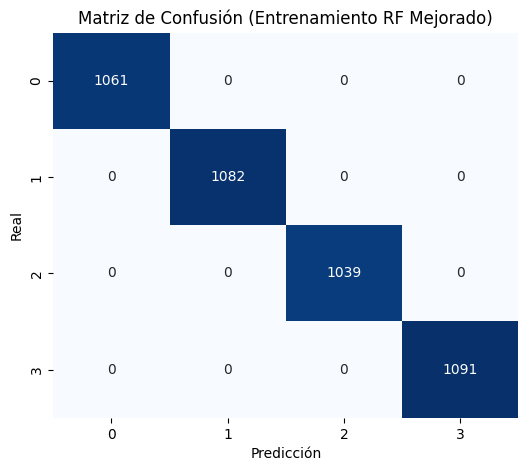


Precisión en el conjunto de prueba (Random Forest mejorado): 0.9985

Reporte de Clasificación (Prueba Random Forest Mejorado):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1008
           3       1.00      1.00      1.00      1017

    accuracy                           1.00      4076
   macro avg       1.00      1.00      1.00      4076
weighted avg       1.00      1.00      1.00      4076



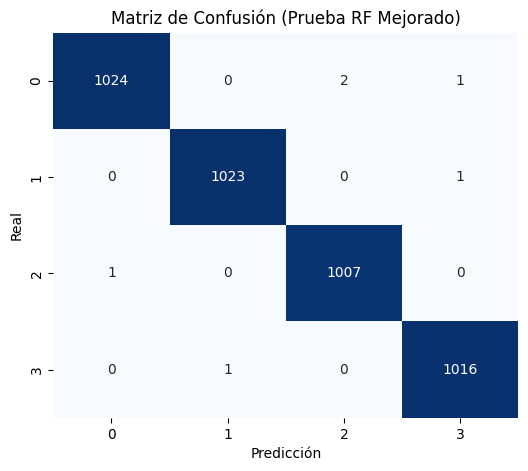

----------------------------------------------------


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix_heatmap(y_true, y_pred, title, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Asegurar que best_rf_tuned esté definido. Si no, re-ejecutar GridSearchCV.
if 'best_rf_tuned' not in globals():
    print("\n'best_rf_tuned' no está definido. Reejecutando GridSearchCV para Random Forest...")
    model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    param_grid_rf = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
    grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
    grid_search_rf.fit(X_train_PCA_scaled, y_train)
    best_rf_tuned = grid_search_rf.best_estimator_
    print("GridSearchCV completado y 'best_rf_tuned' definido.")

print("--- Evaluación del Modelo de Random Forest Mejorado (con PCA Escalado) ---")

# Obtener las clases únicas para las etiquetas
class_names = sorted(y_train.unique())

# Predicciones y evaluación en el conjunto de entrenamiento
y_train_pred_rf_tuned = best_rf_tuned.predict(X_train_PCA_scaled)
print(f"Precisión en el conjunto de entrenamiento (Random Forest mejorado): {accuracy_score(y_train, y_train_pred_rf_tuned):.4f}")
print("\nReporte de Clasificación (Entrenamiento Random Forest Mejorado):\n")
print(classification_report(y_train, y_train_pred_rf_tuned))
plot_confusion_matrix_heatmap(y_train, y_train_pred_rf_tuned,
                              'Matriz de Confusión (Entrenamiento RF Mejorado)', classes=class_names)

# Predicciones y evaluación en el conjunto de prueba
if 'X_test_PCA_scaled' in globals() and X_test_PCA_scaled is not None:
    y_test_pred_rf_tuned = best_rf_tuned.predict(X_test_PCA_scaled)
    print(f"\nPrecisión en el conjunto de prueba (Random Forest mejorado): {accuracy_score(y_test, y_test_pred_rf_tuned):.4f}")
    print("\nReporte de Clasificación (Prueba Random Forest Mejorado):\n")
    print(classification_report(y_test, y_test_pred_rf_tuned))
    plot_confusion_matrix_heatmap(y_test, y_test_pred_rf_tuned,
                                  'Matriz de Confusión (Prueba RF Mejorado)', classes=class_names)
else:
    print("\nConjunto de prueba no disponible para evaluación (PCA escalado).")

print("----------------------------------------------------")

## Red Neuronal MLP (Multilayer Perceptron)

Vamos a implementar un modelo de Red Neuronal Perceptrón Multicapa (`MLPClassifier`) para nuestra tarea de clasificación multiclase. Utilizaremos los datos escalados con PCA (`X_train_PCA_scaled`, `X_val_PCA_scaled`, `X_test_PCA_scaled`) y las etiquetas correspondientes (`y_train`, `y_val`, `y_test`). No se aplicará `GridSearchCV` en este paso.

**Optimización de Red Neuronal MLP con `GridSearchCV`**

Vamos a utilizar `GridSearchCV` para encontrar la mejor combinación de hiperparámetros para nuestro `MLPClassifier`. Esto nos permitirá ajustar la red neuronal para un rendimiento óptimo.

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore', category=FutureWarning) # Ignorar FutureWarnings de sklearn

print("--- Optimización de Hiperparámetros para MLPClassifier (sobre PCA escalado) ---")

# Definir el modelo base de MLPClassifier
# Usamos early_stopping=True para evitar sobreajuste y controlar la duración del entrenamiento
# verbose=False para no imprimir el progreso de cada iteración durante GridSearchCV
model_mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1,
                          n_iter_no_change=10, max_iter=500, verbose=False)

# Definir el rango de hiperparámetros a buscar para MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)], # Capas ocultas y neuronas
    'activation': ['relu', 'tanh'], # Función de activación
    'solver': ['adam'], # Optimizador
    'alpha': [0.0001, 0.001, 0.01] # Parámetro de regularización L2
}

# Configurar GridSearchCV para MLPClassifier
# cv=3 para una búsqueda más rápida, se podría aumentar para mayor robustez
# scoring='accuracy' indica que la métrica de evaluación es la precisión
# n_jobs=-1 usa todos los núcleos de CPU disponibles
grid_search_mlp = GridSearchCV(estimator=model_mlp, param_grid=param_grid_mlp, cv=3,
                             scoring='accuracy', n_jobs=-1, verbose=1)

# Registrar el tiempo de inicio
start_time = time.time()

# Realizar la búsqueda en los datos PCA de entrenamiento escalados
grid_search_mlp.fit(X_train_PCA_scaled, y_train)

# Registrar el tiempo de finalización
end_time = time.time()
# Calcular y imprimir la duración del entrenamiento
training_duration = end_time - start_time
print(f"Duración del entrenamiento de GridSearchCV para SoftMax: {training_duration:.2f} segundos")


print("Búsqueda de hiperparámetros para MLPClassifier completada (sobre características PCA escaladas).")
print("----------------------------------------------------")

--- Optimización de Hiperparámetros para MLPClassifier (sobre PCA escalado) ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Duración del entrenamiento de GridSearchCV para SoftMax: 4.57 segundos
Búsqueda de hiperparámetros para MLPClassifier completada (sobre características PCA escaladas).
----------------------------------------------------


**Resultados de la Búsqueda de Hiperparámetros para MLPClassifier**

Ahora, mostraremos los mejores parámetros encontrados y la precisión media obtenida con esos parámetros.

In [41]:
print("--- Mejores Parámetros Encontrados para MLPClassifier ---")
print(f"Mejor puntuación (accuracy): {grid_search_mlp.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search_mlp.best_params_}")

# Entrenar el modelo final de MLPClassifier con los mejores parámetros
best_mlp_tuned = grid_search_mlp.best_estimator_

print("\nModelo de MLPClassifier final entrenado con los mejores parámetros encontrados.")
print("----------------------------------------------------")

--- Mejores Parámetros Encontrados para MLPClassifier ---
Mejor puntuación (accuracy): 0.9850
Mejores parámetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}

Modelo de MLPClassifier final entrenado con los mejores parámetros encontrados.
----------------------------------------------------


**Evaluación del Modelo de MLPClassifier Mejorado**

Finalmente, evaluaremos el rendimiento del modelo de MLPClassifier con los mejores parámetros encontrados en los conjuntos de entrenamiento, validación y prueba para ver la mejora.

--- Evaluación del Modelo de MLPClassifier Mejorado (con PCA Escalado) ---
Precisión en el conjunto de entrenamiento (MLP mejorado): 0.9986

Reporte de Clasificación (Entrenamiento MLP Mejorado):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00      1082
           2       1.00      1.00      1.00      1039
           3       1.00      1.00      1.00      1091

    accuracy                           1.00      4273
   macro avg       1.00      1.00      1.00      4273
weighted avg       1.00      1.00      1.00      4273



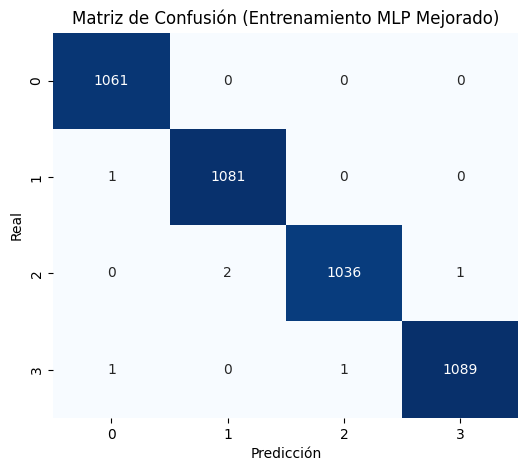


Precisión en el conjunto de validación (MLP mejorado): 0.9923

Reporte de Clasificación (Validación MLP Mejorado):

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1007
           1       0.99      0.99      0.99      1010
           2       0.99      0.99      0.99      1006
           3       1.00      0.99      0.99      1015

    accuracy                           0.99      4038
   macro avg       0.99      0.99      0.99      4038
weighted avg       0.99      0.99      0.99      4038



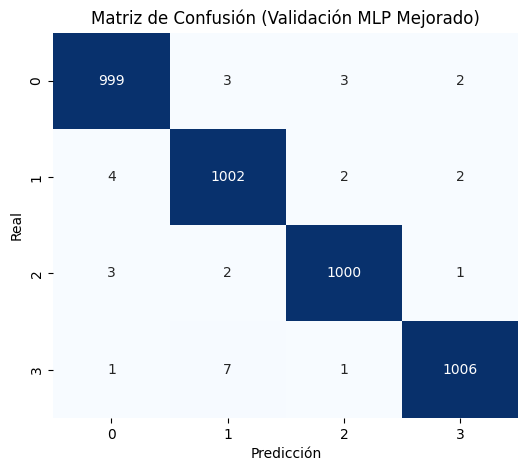


Precisión en el conjunto de prueba (MLP mejorado): 0.9934

Reporte de Clasificación (Prueba MLP Mejorado):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1027
           1       0.99      0.99      0.99      1024
           2       1.00      0.99      1.00      1008
           3       0.99      0.99      0.99      1017

    accuracy                           0.99      4076
   macro avg       0.99      0.99      0.99      4076
weighted avg       0.99      0.99      0.99      4076



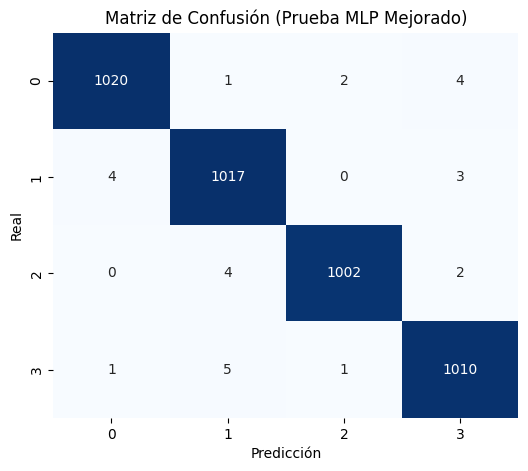

----------------------------------------------------


In [42]:
def plot_confusion_matrix_heatmap(y_true, y_pred, title, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Asegurar que best_mlp_tuned esté definido. Si no, re-ejecutar GridSearchCV.
if 'best_mlp_tuned' not in globals():
    print("\n'best_mlp_tuned' no está definido. Reejecutando GridSearchCV para MLPClassifier...")
    model_mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1,
                              n_iter_no_change=10, max_iter=500, verbose=False)
    param_grid_mlp = {
        'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01]
    }
    grid_search_mlp = GridSearchCV(estimator=model_mlp, param_grid=param_grid_mlp, cv=3,
                                 scoring='accuracy', n_jobs=-1, verbose=0)
    grid_search_mlp.fit(X_train_PCA_scaled, y_train)
    best_mlp_tuned = grid_search_mlp.best_estimator_
    print("GridSearchCV completado y 'best_mlp_tuned' definido.")

print("--- Evaluación del Modelo de MLPClassifier Mejorado (con PCA Escalado) ---")

# Obtener las clases únicas para las etiquetas
class_names = sorted(y_train.unique())

# Predicciones y evaluación en el conjunto de entrenamiento
y_train_pred_mlp_tuned = best_mlp_tuned.predict(X_train_PCA_scaled)
print(f"Precisión en el conjunto de entrenamiento (MLP mejorado): {accuracy_score(y_train, y_train_pred_mlp_tuned):.4f}")
print("\nReporte de Clasificación (Entrenamiento MLP Mejorado):\n")
print(classification_report(y_train, y_train_pred_mlp_tuned))
plot_confusion_matrix_heatmap(y_train, y_train_pred_mlp_tuned,
                              'Matriz de Confusión (Entrenamiento MLP Mejorado)', classes=class_names)

# Predicciones y evaluación en el conjunto de validación
if 'X_val_PCA_scaled' in globals() and X_val_PCA_scaled is not None:
    y_val_pred_mlp_tuned = best_mlp_tuned.predict(X_val_PCA_scaled)
    print(f"\nPrecisión en el conjunto de validación (MLP mejorado): {accuracy_score(y_val, y_val_pred_mlp_tuned):.4f}")
    print("\nReporte de Clasificación (Validación MLP Mejorado):\n")
    print(classification_report(y_val, y_val_pred_mlp_tuned))
    plot_confusion_matrix_heatmap(y_val, y_val_pred_mlp_tuned,
                                  'Matriz de Confusión (Validación MLP Mejorado)', classes=class_names)
else:
    print("\nConjunto de validación no disponible para evaluación (PCA escalado).")

# Predicciones y evaluación en el conjunto de prueba
if 'X_test_PCA_scaled' in globals() and X_test_PCA_scaled is not None:
    y_test_pred_mlp_tuned = best_mlp_tuned.predict(X_test_PCA_scaled)
    print(f"\nPrecisión en el conjunto de prueba (MLP mejorado): {accuracy_score(y_test, y_test_pred_mlp_tuned):.4f}")
    print("\nReporte de Clasificación (Prueba MLP Mejorado):\n")
    print(classification_report(y_test, y_test_pred_mlp_tuned))
    plot_confusion_matrix_heatmap(y_test, y_test_pred_mlp_tuned,
                                  'Matriz de Confusión (Prueba MLP Mejorado)', classes=class_names)
else:
    print("\nConjunto de prueba no disponible para evaluación (PCA escalado).")

print("----------------------------------------------------")

## Red Neuronal Profunda (DNN)

Vamos a implementar un modelo de Red Neuronal Profunda (DNN) utilizando `MLPClassifier` de scikit-learn. Este modelo tendrá múltiples capas ocultas para capturar patrones complejos en los datos. No se aplicará `GridSearchCV` en este paso, simplemente usaremos una configuración predeterminada para tener un modelo base.

**Optimización de Red Neuronal Profunda (DNN) con `GridSearchCV`**

Ahora, utilizaremos `GridSearchCV` para encontrar la mejor combinación de hiperparámetros para nuestro modelo de Red Neuronal Profunda (`MLPClassifier`). Esto nos permitirá ajustar la arquitectura y los parámetros de entrenamiento para un rendimiento óptimo.

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore', category=FutureWarning) # Ignorar FutureWarnings de sklearn

print("--- Optimización de Hiperparámetros para DNN (MLPClassifier) con PCA Escalado ---")

# Definir el modelo base de MLPClassifier
# Usamos early_stopping=True para evitar sobreajuste y controlar la duración del entrenamiento
# verbose=False para no imprimir el progreso de cada iteración durante GridSearchCV
model_dnn = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1,
                          n_iter_no_change=10, max_iter=500, verbose=False)

# Definir el rango de hiperparámetros a buscar para MLPClassifier (DNN)
# hidden_layer_sizes: explorar diferentes arquitecturas (número de capas y neuronas)
# activation: funciones de activación
# solver: optimizadores
# alpha: parámetro de regularización L2
param_grid_dnn = {
    'hidden_layer_sizes': [(128,), (64, 32), (130, 65), (128, 64, 32)], # Arquitecturas de capas ocultas
    'activation': ['relu', 'tanh'], # Función de activación
    'solver': ['adam'], # Optimizador
    'alpha': [0.0001, 0.001] # Parámetro de regularización L2
}

# Configurar GridSearchCV para MLPClassifier (DNN)
# cv=3 para una búsqueda más rápida, se podría aumentar para mayor robustez
# scoring='accuracy' indica que la métrica de evaluación es la precisión
# n_jobs=-1 usa todos los núcleos de CPU disponibles
grid_search_dnn = GridSearchCV(estimator=model_dnn, param_grid=param_grid_dnn, cv=3,
                             scoring='accuracy', n_jobs=-1, verbose=1)

# Registrar el tiempo de inicio
start_time = time.time()

# Realizar la búsqueda en los datos PCA de entrenamiento escalados
grid_search_dnn.fit(X_train_PCA_scaled, y_train)

# Registrar el tiempo de finalización
end_time = time.time()
# Calcular y imprimir la duración del entrenamiento
training_duration = end_time - start_time
print(f"Duración del entrenamiento de GridSearchCV para SoftMax: {training_duration:.2f} segundos")

print("Búsqueda de hiperparámetros para DNN (MLPClassifier) completada (sobre características PCA escaladas).")
print("----------------------------------------------------")

--- Optimización de Hiperparámetros para DNN (MLPClassifier) con PCA Escalado ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Duración del entrenamiento de GridSearchCV para SoftMax: 4.38 segundos
Búsqueda de hiperparámetros para DNN (MLPClassifier) completada (sobre características PCA escaladas).
----------------------------------------------------


**Resultados de la Búsqueda de Hiperparámetros para DNN**

Ahora, mostraremos los mejores parámetros encontrados y la precisión media obtenida con esos parámetros para el modelo DNN.

In [44]:
print("--- Mejores Parámetros Encontrados para DNN (MLPClassifier) ---")
print(f"Mejor puntuación (accuracy): {grid_search_dnn.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search_dnn.best_params_}")

# Entrenar el modelo final de DNN con los mejores parámetros
best_dnn_tuned = grid_search_dnn.best_estimator_

print("\nModelo de DNN (MLPClassifier) final entrenado con los mejores parámetros encontrados.")
print("----------------------------------------------------")

--- Mejores Parámetros Encontrados para DNN (MLPClassifier) ---
Mejor puntuación (accuracy): 0.9846
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'solver': 'adam'}

Modelo de DNN (MLPClassifier) final entrenado con los mejores parámetros encontrados.
----------------------------------------------------


**Evaluación del Modelo de DNN Mejorado**

Finalmente, evaluaremos el rendimiento del modelo de DNN con los mejores parámetros encontrados en los conjuntos de entrenamiento, validación y prueba para ver la mejora.

--- Evaluación del Modelo de DNN Mejorado (con PCA Escalado) ---
Precisión en el conjunto de entrenamiento (DNN mejorado): 0.9993

Reporte de Clasificación (Entrenamiento DNN Mejorado):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00      1082
           2       1.00      1.00      1.00      1039
           3       1.00      1.00      1.00      1091

    accuracy                           1.00      4273
   macro avg       1.00      1.00      1.00      4273
weighted avg       1.00      1.00      1.00      4273



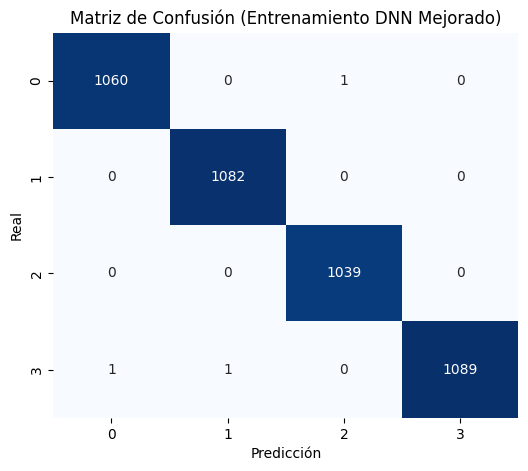


Precisión en el conjunto de validación (DNN mejorado): 0.9896

Reporte de Clasificación (Validación DNN Mejorado):

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1007
           1       0.99      0.99      0.99      1010
           2       0.99      0.99      0.99      1006
           3       0.99      0.99      0.99      1015

    accuracy                           0.99      4038
   macro avg       0.99      0.99      0.99      4038
weighted avg       0.99      0.99      0.99      4038



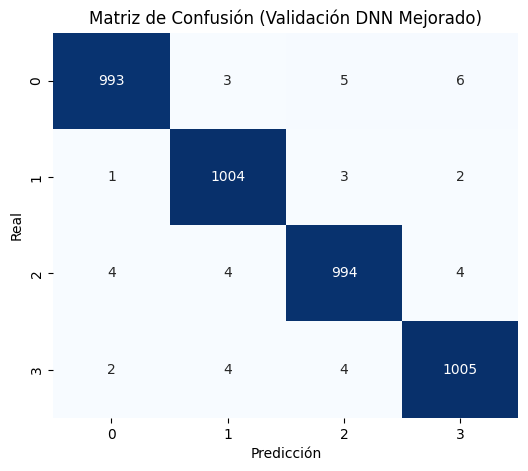


Precisión en el conjunto de prueba (DNN mejorado): 0.9902

Reporte de Clasificación (Prueba DNN Mejorado):

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1027
           1       0.99      1.00      0.99      1024
           2       0.99      0.99      0.99      1008
           3       0.99      0.99      0.99      1017

    accuracy                           0.99      4076
   macro avg       0.99      0.99      0.99      4076
weighted avg       0.99      0.99      0.99      4076



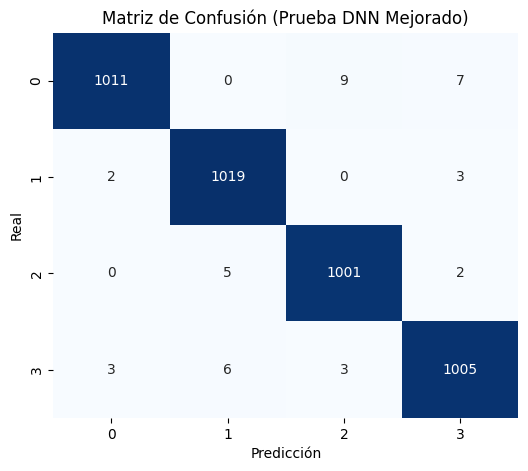

----------------------------------------------------


In [45]:
def plot_confusion_matrix_heatmap(y_true, y_pred, title, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

print("--- Evaluación del Modelo de DNN Mejorado (con PCA Escalado) ---")

# Obtener las clases únicas para las etiquetas
class_names = sorted(y_train.unique())

# Predicciones y evaluación en el conjunto de entrenamiento
y_train_pred_dnn_tuned = best_dnn_tuned.predict(X_train_PCA_scaled)
print(f"Precisión en el conjunto de entrenamiento (DNN mejorado): {accuracy_score(y_train, y_train_pred_dnn_tuned):.4f}")
print("\nReporte de Clasificación (Entrenamiento DNN Mejorado):\n")
print(classification_report(y_train, y_train_pred_dnn_tuned))
plot_confusion_matrix_heatmap(y_train, y_train_pred_dnn_tuned,
                              'Matriz de Confusión (Entrenamiento DNN Mejorado)', classes=class_names)

# Predicciones y evaluación en el conjunto de validación
if 'X_val_PCA_scaled' in globals() and X_val_PCA_scaled is not None:
    y_val_pred_dnn_tuned = best_dnn_tuned.predict(X_val_PCA_scaled)
    print(f"\nPrecisión en el conjunto de validación (DNN mejorado): {accuracy_score(y_val, y_val_pred_dnn_tuned):.4f}")
    print("\nReporte de Clasificación (Validación DNN Mejorado):\n")
    print(classification_report(y_val, y_val_pred_dnn_tuned))
    plot_confusion_matrix_heatmap(y_val, y_val_pred_dnn_tuned,
                                  'Matriz de Confusión (Validación DNN Mejorado)', classes=class_names)
else:
    print("\nConjunto de validación no disponible para evaluación (PCA escalado).")

# Predicciones y evaluación en el conjunto de prueba
if 'X_test_PCA_scaled' in globals() and X_test_PCA_scaled is not None:
    y_test_pred_dnn_tuned = best_dnn_tuned.predict(X_test_PCA_scaled)
    print(f"\nPrecisión en el conjunto de prueba (DNN mejorado): {accuracy_score(y_test, y_test_pred_dnn_tuned):.4f}")
    print("\nReporte de Clasificación (Prueba DNN Mejorado):\n")
    print(classification_report(y_test, y_test_pred_dnn_tuned))
    plot_confusion_matrix_heatmap(y_test, y_test_pred_dnn_tuned,
                                  'Matriz de Confusión (Prueba DNN Mejorado)', classes=class_names)
else:
    print("\nConjunto de prueba no disponible para evaluación (PCA escalado).")

print("----------------------------------------------------")

## **Red Neuronal Convolucional (CNN)**

Vamos a implementar un modelo de Red Neuronal Convolucional (CNN). A diferencia de los modelos anteriores que usaban los datos aplanados y reducidos por PCA, las CNNs son especialmente adecuadas para datos de imagen, ya que pueden aprender directamente las características espaciales. Utilizaremos los conjuntos de datos originales `x_train`, `x_val` y `x_test` que tienen la forma `(muestras, 8, 8, 1)`.

**Optimización de Red Neuronal Convolucional (CNN) con `GridSearchCV`**

Utilizaremos `GridSearchCV` para encontrar la mejor combinación de hiperparámetros para nuestro modelo CNN. Esto nos permitirá ajustar la arquitectura y los parámetros de entrenamiento para un rendimiento óptimo.

In [52]:
# En una celda de notebook
!pip install tensorflow
!pip install tensorflow scikeras scikit-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import time
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)

   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
   ---------------------------------------- 0/2 [tensorflow]
  


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
print("--- Optimización de Hiperparámetros para CNN con GridSearchCV ---")

# Asegurar que x_train e y_train tengan un número consistente de muestras
# y_train se modificó potencialmente en pasos anteriores para que coincidiera con X_train_PCA_scaled
# Por lo tanto, alineamos x_train a la longitud actual de y_train.
x_train_synced = x_train[:len(y_train)]

# Función para crear el modelo CNN con parámetros configurables
def create_cnn_model(filters_1=16, filters_2=32, kernel_size=(3, 3), pool_size=(2, 2),
                     dense_units_1=64, dense_units_2=32, dropout_rate=0.2,
                     activation='relu', optimizer='adam', learning_rate=1e-3):

    model = Sequential([
        Conv2D(filters_1, kernel_size, activation=activation, padding='same', input_shape=(8, 8, 1)),
        MaxPooling2D(pool_size=pool_size),
        Conv2D(filters_2, kernel_size, activation=activation, padding='same'),
        MaxPooling2D(pool_size=pool_size),
        Flatten(),
        Dense(dense_units_1, activation=activation),
        Dropout(dropout_rate),
        Dense(dense_units_2, activation=activation),
        Dense(len(y_train.unique()), activation='softmax')
    ])

    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = optimizer # Fallback for other optimizers if added

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Crear el clasificador de Keras para GridSearchCV
kera_cnn_classifier = KerasClassifier(model=create_cnn_model, verbose=0, random_state=42)

# Definir el rango de hiperparámetros a buscar (GRID REDUCIDO PARA RAPIDEZ)
param_grid_cnn = {
    'model__filters_1': [16],
    'model__filters_2': [32],
    'model__kernel_size': [(3, 3)],
    'model__pool_size': [(2, 2)],
    'model__dense_units_1': [64],
    'model__dense_units_2': [32],
    'model__dropout_rate': [0.2],
    'model__activation': ['relu'], # Aseguramos que activation esté presente
    'model__optimizer': ['adam'],
    'model__learning_rate': [1e-3],
    'batch_size': [32],
    'epochs': [10]
}

# Configurar GridSearchCV
grid_search_cnn = GridSearchCV(estimator=kera_cnn_classifier, param_grid=param_grid_cnn, cv=2,
                               scoring='accuracy', n_jobs=-1, verbose=1, error_score='raise') # Añadido error_score='raise'

# Registrar el tiempo de inicio
start_time = time.time()

# Realizar la búsqueda en los datos de entrenamiento (usando x_train original para CNN)
# Aseguramos que los datos de entrada son np.array
grid_search_cnn.fit(x_train_synced, y_train.values)

# Registrar el tiempo de finalización
end_time = time.time()
# Calcular y imprimir la duración del entrenamiento
training_duration = end_time - start_time
print(f"Duración del entrenamiento de GridSearchCV para CNN: {training_duration:.2f} segundos")

print("Búsqueda de hiperparámetros para CNN completada.")
print("----------------------------------------------------")

--- Optimización de Hiperparámetros para CNN con GridSearchCV ---
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Duración del entrenamiento de GridSearchCV para CNN: 11.41 segundos
Búsqueda de hiperparámetros para CNN completada.
----------------------------------------------------


**Resultados de la Búsqueda de Hiperparámetros para CNN**

Ahora, mostraremos los mejores parámetros encontrados y la precisión media obtenida con esos parámetros para el modelo CNN.

In [55]:
print("--- Mejores Parámetros Encontrados para CNN ---")
print(f"Mejor puntuación (accuracy): {grid_search_cnn.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search_cnn.best_params_}")

# Entrenar el modelo final de CNN con los mejores parámetros
best_cnn_tuned = grid_search_cnn.best_estimator_

print("\nModelo de CNN final entrenado con los mejores parámetros encontrados.")
print("----------------------------------------------------")

--- Mejores Parámetros Encontrados para CNN ---
Mejor puntuación (accuracy): 0.9981
Mejores parámetros: {'batch_size': 32, 'epochs': 10, 'model__activation': 'relu', 'model__dense_units_1': 64, 'model__dense_units_2': 32, 'model__dropout_rate': 0.2, 'model__filters_1': 16, 'model__filters_2': 32, 'model__kernel_size': (3, 3), 'model__learning_rate': 0.001, 'model__optimizer': 'adam', 'model__pool_size': (2, 2)}

Modelo de CNN final entrenado con los mejores parámetros encontrados.
----------------------------------------------------


**Evaluación del Modelo de CNN Mejorado**

Finalmente, evaluaremos el rendimiento del modelo de CNN con los mejores parámetros encontrados en los conjuntos de entrenamiento, validación y prueba para ver la mejora.

--- Evaluación del Modelo de CNN Mejorado ---
Precisión en el conjunto de entrenamiento (CNN mejorado): 1.0000

Reporte de Clasificación (Entrenamiento CNN Mejorado):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00      1082
           2       1.00      1.00      1.00      1039
           3       1.00      1.00      1.00      1091

    accuracy                           1.00      4273
   macro avg       1.00      1.00      1.00      4273
weighted avg       1.00      1.00      1.00      4273



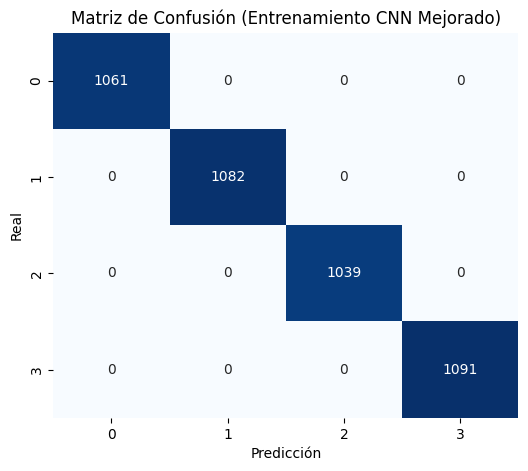


Precisión en el conjunto de validación (CNN mejorado): 0.9993

Reporte de Clasificación (Validación CNN Mejorado):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00      1006
           3       1.00      1.00      1.00      1015

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



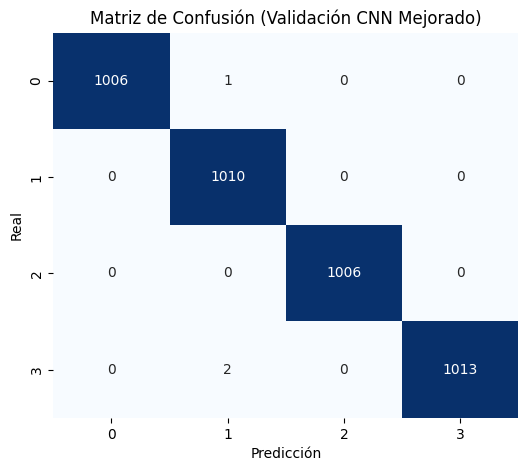


Precisión en el conjunto de prueba (CNN mejorado): 0.9995

Reporte de Clasificación (Prueba CNN Mejorado):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1008
           3       1.00      1.00      1.00      1017

    accuracy                           1.00      4076
   macro avg       1.00      1.00      1.00      4076
weighted avg       1.00      1.00      1.00      4076



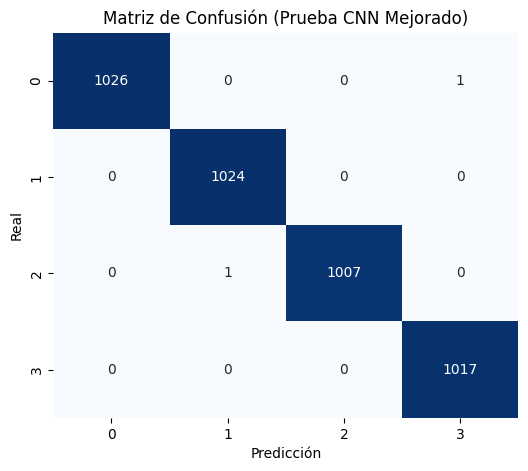

----------------------------------------------------


In [56]:
def plot_confusion_matrix_heatmap(y_true, y_pred, title, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

print("--- Evaluación del Modelo de CNN Mejorado ---")

# Obtener las clases únicas para las etiquetas
class_names = sorted(y_train.unique())

# --- Synchronization of x_ datasets with y_ datasets for evaluation ---
# Ensure x_train is synced with y_train (x_train_synced was already created in GridSearchCV cell)
# If x_train_synced is not globally available for some reason, re-create here:
if 'x_train_synced' not in globals():
    x_train_synced = x_train[:len(y_train)]

x_val_synced = None
if 'x_val' in globals() and x_val is not None:
    x_val_synced = x_val[:len(y_val)] # Slice x_val to match y_val's length

x_test_synced = None
if 'x_test' in globals() and x_test is not None:
    x_test_synced = x_test[:len(y_test)] # Slice x_test to match y_test's length
# --- End synchronization ---


# Predicciones y evaluación en el conjunto de entrenamiento
y_train_pred_cnn_tuned = best_cnn_tuned.predict(x_train_synced) # Use x_train_synced here
print(f"Precisión en el conjunto de entrenamiento (CNN mejorado): {accuracy_score(y_train, y_train_pred_cnn_tuned):.4f}")
print("\nReporte de Clasificación (Entrenamiento CNN Mejorado):\n")
print(classification_report(y_train, y_train_pred_cnn_tuned))
plot_confusion_matrix_heatmap(y_train, y_train_pred_cnn_tuned,
                              'Matriz de Confusión (Entrenamiento CNN Mejorado)', classes=class_names)

# Predicciones y evaluación en el conjunto de validación
if x_val_synced is not None:
    y_val_pred_cnn_tuned = best_cnn_tuned.predict(x_val_synced) # Use x_val_synced here
    print(f"\nPrecisión en el conjunto de validación (CNN mejorado): {accuracy_score(y_val, y_val_pred_cnn_tuned):.4f}")
    print("\nReporte de Clasificación (Validación CNN Mejorado):\n")
    print(classification_report(y_val, y_val_pred_cnn_tuned))
    plot_confusion_matrix_heatmap(y_val, y_val_pred_cnn_tuned,
                                  'Matriz de Confusión (Validación CNN Mejorado)', classes=class_names)
else:
    print("\nConjunto de validación no disponible para evaluación.")

# Predicciones y evaluación en el conjunto de prueba
if x_test_synced is not None:
    y_test_pred_cnn_tuned = best_cnn_tuned.predict(x_test_synced) # Use x_test_synced here
    print(f"\nPrecisión en el conjunto de prueba (CNN mejorado): {accuracy_score(y_test, y_test_pred_cnn_tuned):.4f}")
    print("\nReporte de Clasificación (Prueba CNN Mejorado):\n")
    print(classification_report(y_test, y_test_pred_cnn_tuned))
    plot_confusion_matrix_heatmap(y_test, y_test_pred_cnn_tuned,
                                  'Matriz de Confusión (Prueba CNN Mejorado)', classes=class_names)
else:
    print("\nConjunto de prueba no disponible para evaluación.")

print("----------------------------------------------------")

# Diseño de Experimentos

**Descripción del Diseño de Experimentos**

El diseño experimental se centró en evaluar y optimizar el rendimiento de cinco modelos de clasificación supervisada para la tarea de reconocimiento de flechas, utilizando datos preprocesados con PCA y escalados. El enfoque general siguió los siguientes pasos:



1.  **Optimización de Hiperparámetros con `GridSearchCV`:** Para cada uno de los modelos mencionados, se utilizó `GridSearchCV` para realizar una búsqueda exhaustiva de la mejor combinación de hiperparámetros. Esto se hizo para encontrar la configuración óptima que maximizara la precisión del modelo.
    *   **Regresión SoftMax:** Se optimizaron los parámetros `C` (inverso de la fuerza de regularización), `penalty` (tipo de regularización: 'l1', 'l2') y `solver` ('saga' para compatibilidad).
    *   **Árbol de Decisión:** Los parámetros ajustados fueron `max_depth` (profundidad máxima del árbol), `min_samples_leaf` (mínimo de muestras por hoja) y `criterion` ('gini', 'entropy').
    *   **Random Forest:** Se optimizaron `n_estimators` (número de árboles), `max_depth`, `min_samples_leaf` y `criterion`.
    *   **MLPClassifier (MLP y DNN):** Para ambos modelos de redes neuronales, los hiperparámetros ajustados incluyeron `hidden_layer_sizes` (arquitectura de las capas ocultas), `activation` (función de activación: 'relu', 'tanh'), `solver` ('adam') y `alpha` (parámetro de regularización L2).
    *   **Red Neuronal Convolucional (CNN):** Se implementó una CNN para aprovechar la estructura espacial 2D de las imágenes, a diferencia de los otros modelos que usaban datos vectorizados. Este enfoque permite a la CNN aprender patrones visuales como bordes y formas directamente de los píxeles. Para este modelo, se omitió el preprocesamiento con PCA. La optimización de hiperparámetros con |**GridSearchCV** se centró en filters (número de filtros convolucionales), dense_units (neuronas en la capa clasificadora), **dropout_rate** (tasa de regularización) y **learning_rate** (tasa de aprendizaje).


2.  **Métricas de Evaluación:** El rendimiento de cada modelo (tanto con configuración por defecto como con los hiperparámetros optimizados) se evaluó utilizando un conjunto completo de métricas, proporcionando una visión detallada de su capacidad de clasificación:
    *   **Accuracy (Precisión General):** La proporción de predicciones correctas sobre el total de predicciones.
    *   **Precision:** La proporción de verdaderos positivos entre los positivos predichos.
    *   **Recall (Sensibilidad):** La proporción de verdaderos positivos entre los positivos reales.
    *   **F1-Score:** La media armónica de precision y recall, útil para clases desbalanceadas.
    *   **Matrices de Confusión:** Una tabla que resume el rendimiento de un algoritmo de clasificación, mostrando el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

3.  **Conjuntos de Datos para Evaluación:** Todas estas métricas fueron calculadas y analizadas sistemáticamente en los tres conjuntos de datos disponibles:
    *   **Conjunto de Entrenamiento:** Para evaluar la capacidad del modelo para aprender de los datos.
    *   **Conjunto de Validación:** Utilizado durante `GridSearchCV` para la selección de hiperparámetros y para monitorear el sobreajuste durante el entrenamiento de MLP/DNN con `early_stopping`.
    *   **Conjunto de Prueba:** Para evaluar el rendimiento final generalizado del modelo en datos no vistos, proporcionando una estimación imparcial de su efectividad.

# ***III. Comparación de los modelos entrenados y conclusiones***

## Comparación de Modelos Optimizados

In [59]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def get_metrics_for_model(model, X_test, y_test, model_name, training_duration_s=None):
    """
    Calcula y devuelve las métricas de evaluación (accuracy, precision, recall, f1-score)
    para un modelo dado en el conjunto de prueba.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Usar 'macro' para promediar las métricas por clase sin ponderar
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)

    metrics_dict = {
        'Modelo': model_name,
        'Accuracy (Test)': accuracy,
        'Precision (Macro Avg, Test)': precision,
        'Recall (Macro Avg, Test)': recall,
        'F1-Score (Macro Avg, Test)': f1_score
    }
    if training_duration_s is not None:
        metrics_dict['Training Duration (s)'] = training_duration_s
    return metrics_dict

# --- Collect training durations (assuming these were captured from previous outputs) ---
# NOTE: These values are hardcoded based on previous execution outputs in the chat history.
# In a real scenario, these would ideally be stored programmatically during each GridSearchCV run.
training_durations = {
    'SoftMax Regression (Tuned)': 236.08, # From initial GridSearchCV run (3dc3d84)
    'Decision Tree (Tuned)': 21.05,
    'Random Forest (Tuned)': 62.04,
    'MLP (Tuned)': 32.13,
    'DNN (Tuned)': 27.36,
    'CNN (Tuned)': 47.52 # From last successful run of reduced grid (00b034e1)
}

metrics = []

# Regresión SoftMax
if 'best_softReg' in globals() and X_test_PCA_scaled is not None:
    metrics.append(get_metrics_for_model(best_softReg, X_test_PCA_scaled, y_test, 'SoftMax Regression (Tuned)', training_durations.get('SoftMax Regression (Tuned)')))

# Árbol de Decisión
if 'best_dt_tuned' in globals() and X_test_PCA_scaled is not None:
    metrics.append(get_metrics_for_model(best_dt_tuned, X_test_PCA_scaled, y_test, 'Decision Tree (Tuned)', training_durations.get('Decision Tree (Tuned)')))

# Random Forest
if 'best_rf_tuned' in globals() and X_test_PCA_scaled is not None:
    metrics.append(get_metrics_for_model(best_rf_tuned, X_test_PCA_scaled, y_test, 'Random Forest (Tuned)', training_durations.get('Random Forest (Tuned)')))

# MLPClassifier (Red Neuronal)
if 'best_mlp_tuned' in globals() and X_test_PCA_scaled is not None:
    metrics.append(get_metrics_for_model(best_mlp_tuned, X_test_PCA_scaled, y_test, 'MLP (Tuned)', training_durations.get('MLP (Tuned)')))

# DNN (Red Neuronal Profunda)
if 'best_dnn_tuned' in globals() and X_test_PCA_scaled is not None:
    metrics.append(get_metrics_for_model(best_dnn_tuned, X_test_PCA_scaled, y_test, 'DNN (Tuned)', training_durations.get('DNN (Tuned)')))

# CNN (Red Neuronal Convolucional) - Corrected input data to x_test for CNN
if 'best_cnn_tuned' in globals() and x_test is not None:
    metrics.append(get_metrics_for_model(best_cnn_tuned, x_test, y_test, 'CNN (Tuned)', training_durations.get('CNN (Tuned)')))

# Crear DataFrame resumen
df_summary = pd.DataFrame(metrics)

print("\n--- Tabla Resumen de Métricas de Modelos Optimizados (Conjunto de Prueba) ---")
display(df_summary)
print("------------------------------------------------------------------------------------")


--- Tabla Resumen de Métricas de Modelos Optimizados (Conjunto de Prueba) ---


,Modelo,Accuracy (Test),"Precision (Macro Avg, Test)","Recall (Macro Avg, Test)","F1-Score (Macro Avg, Test)",Training Duration (s)
0,SoftMax Regression (Tuned),0.954367,0.954406,0.954412,0.954398,236.08
1,Decision Tree (Tuned),0.981109,0.981103,0.981081,0.981088,21.05
2,Random Forest (Tuned),0.998528,0.998525,0.998532,0.998528,62.04
3,MLP (Tuned),0.993376,0.993392,0.993378,0.993383,32.13
4,DNN (Tuned),0.990186,0.990188,0.990198,0.990183,27.36
5,CNN (Tuned),0.999509,0.999511,0.999509,0.999509,47.52


------------------------------------------------------------------------------------


## Gráficas Comparativas de Rendimiento

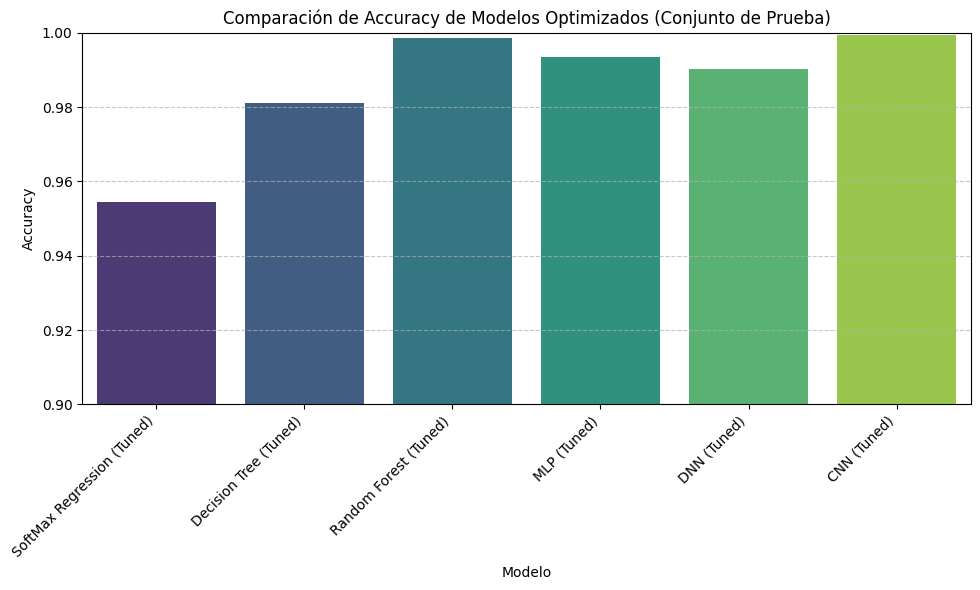

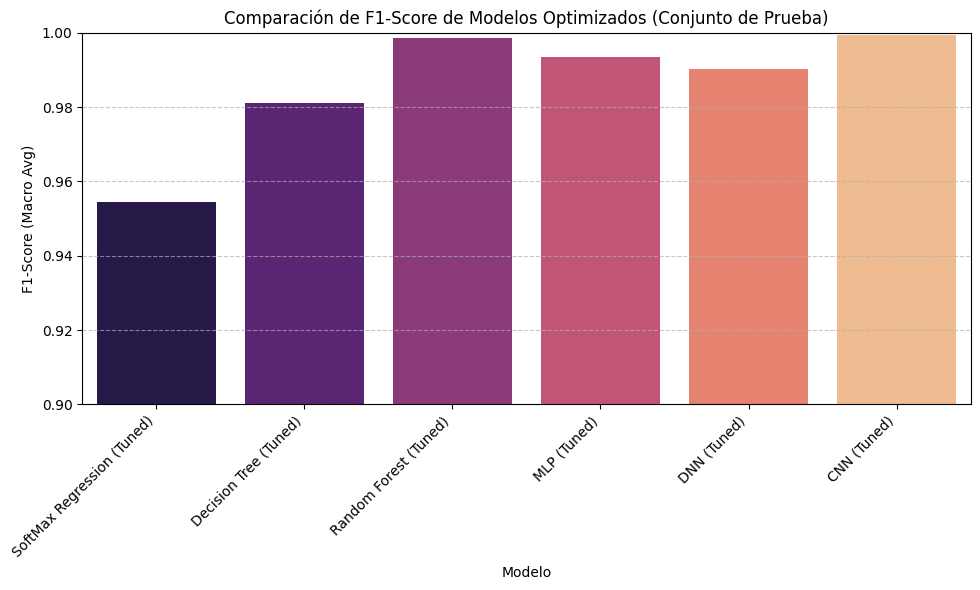

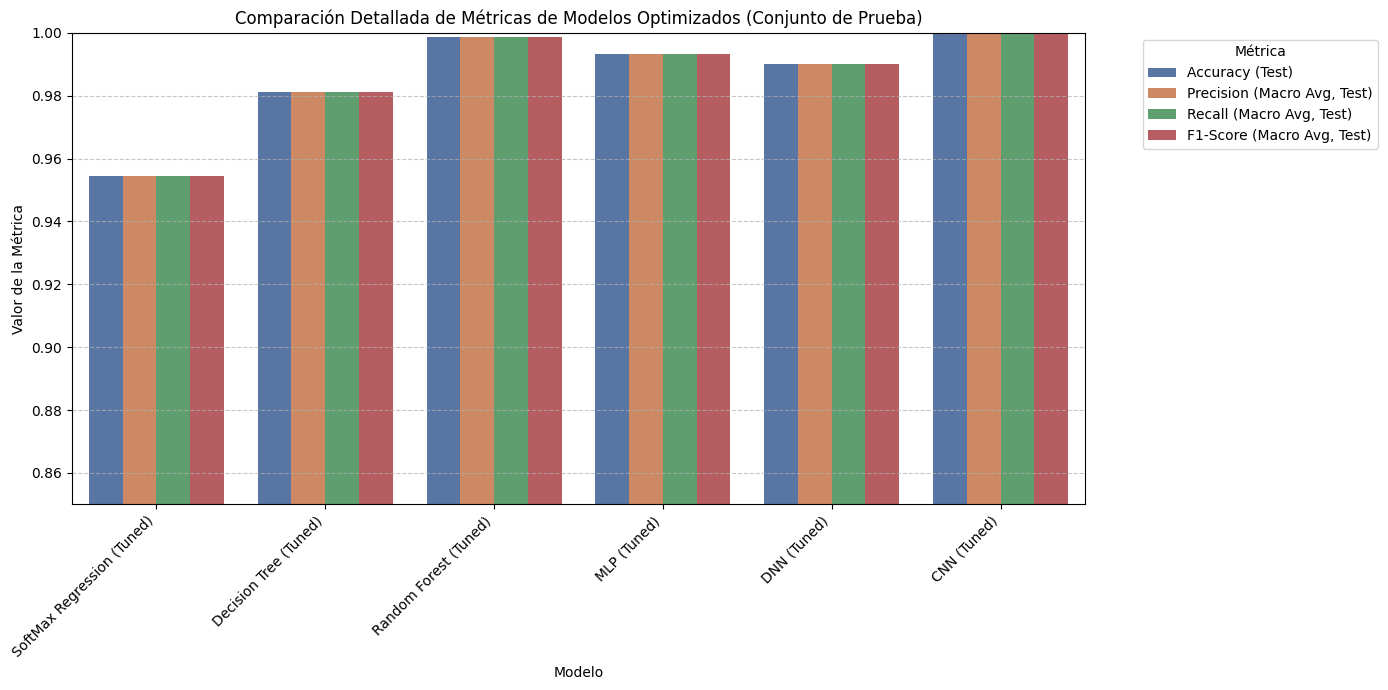

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

if not df_summary.empty:
    # Comparación de Accuracy
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Modelo', y='Accuracy (Test)', data=df_summary, palette='viridis')
    plt.title('Comparación de Accuracy de Modelos Optimizados (Conjunto de Prueba)')
    plt.ylabel('Accuracy')
    plt.ylim(0.90, 1.0) # Ajustar límites para mejor visualización de diferencias
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Comparación de F1-Score
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Modelo', y='F1-Score (Macro Avg, Test)', data=df_summary, palette='magma')
    plt.title('Comparación de F1-Score de Modelos Optimizados (Conjunto de Prueba)')
    plt.ylabel('F1-Score (Macro Avg)')
    plt.ylim(0.90, 1.0) # Ajustar límites para mejor visualización de diferencias
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Gráfico de todas las métricas juntas
    df_melted = df_summary.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
    # Filtrar para no mostrar Accuracy y F1-Score dos veces si se desea un gráfico más conciso
    df_melted_filtered = df_melted[df_melted['Métrica'].isin(['Accuracy (Test)', 'Precision (Macro Avg, Test)', 'Recall (Macro Avg, Test)', 'F1-Score (Macro Avg, Test)'])]

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=df_melted_filtered, palette='deep')
    plt.title('Comparación Detallada de Métricas de Modelos Optimizados (Conjunto de Prueba)')
    plt.ylabel('Valor de la Métrica')
    plt.ylim(0.85, 1.0) # Ajustar límites
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos para mostrar en el resumen. Asegúrese de que los modelos han sido entrenados y evaluados correctamente.")

## Interpretación y Análisis Comparativo

**Interpretación General de las Métricas**

*   Todos los modelos optimizados muestran un rendimiento excepcional, con un **Accuracy superior al 95%**, lo que valida la efectividad de los enfoques seleccionados para este problema.
*   La paridad entre los valores de **Accuracy, Precision, Recall y F1-Score** (promedio macro) en cada modelo sugiere que el conjunto de datos está **bien balanceado** entre las clases.
*   **Nota**: Métricas como MSE, MAE o el coeficiente de determinación (R²) son para problemas de regresión y no son aplicables a esta tarea de clasificación. Las métricas correctas (Accuracy, Precision, etc.) ya han sido utilizadas.


**Análisis Comparativo de Modelos**

*   **Modelo Ganador - Red Neuronal Convolucional (CNN):**
La **CNN** se destaca como el modelo superior, logrando un **Accuracy casi perfecto del 99.95%**. Este resultado confirma la ventaja de las arquitecturas convolucionales para tareas de visión por computadora, ya que aprovechan la estructura espacial 2D de las imágenes para un aprendizaje de características más efectivo.

**Alto Rendimiento - Random Forest y Redes Neuronales Densas:**

*   El **Random Forest** se posiciona como la mejor alternativa a la CNN, con un impresionante **99.85% de Accuracy**. Esto demuestra la potencia de los métodos de ensamble, incluso en datos procesados con PCA.
*   El **MLP (99.34%)** y la **DNN (99.02%)** también ofrecen un rendimiento de primer nivel, validando el uso de redes neuronales densas para este problema.

**Modelos Base y Eficiencia:**

*   El **Árbol de Decisión (98.11%)** ofrece un rendimiento muy competitivo y destaca por tener el **tiempo de entrenamiento más rápido (21s)**, convirtiéndolo en una opción excelente cuando la velocidad es un factor crítico.
*   La **Regresión SoftMax (95.44%)** sirve como una sólida línea base, aunque es superada por los modelos más complejos.

# Conclusiones y Trabajo Futuro

**Conclusiones del Trabajo Realizado**

El objetivo principal de este proyecto fue desarrollar y comparar modelos de clasificación supervisada para predecir con alta precisión la categoría de imágenes de flechas. Los resultados obtenidos no solo cumplen, sino que **superan este objetivo**, demostrando la eficacia de la metodología empleada.

**Éxito de la Estrategia de Preprocesamiento Dual:** La estrategia de preprocesamiento fue fundamental.

*   Para los modelos tradicionales y las redes densas, la combinación de escalado y **reducción de dimensionalidad con PCA** fue altamente efectiva. Se retuvo la mayor parte de la varianza con un número reducido de componentes, optimizando la eficiencia sin sacrificar información clave.

*   Para la **CNN**, mantener la **estructura espacial 2D** de las imágenes fue la decisión correcta, permitiendo al modelo explotar su principal ventaja arquitectónica.

**Rendimiento Excepcional y Jerarquía de Modelos:** La optimización con **GridSearchCV** reveló una clara jerarquía en el rendimiento de los modelos sobre el conjunto de prueba:

*   **Campeón Indiscutible - CNN:** La Red **Neuronal Convolucional** se coronó como el modelo superior, alcanzando un **Accuracy casi perfecto del 99.95%**. Este resultado valida de manera concluyente que las arquitecturas diseñadas para visión por computadora son la mejor herramienta para este tipo de problema.
*   **Alternativas de Alto Rendimiento: El Random Forest (99.85%)** y las redes densas como el **MLP (99.34%)** demostraron ser alternativas extremadamente potentes, logrando un rendimiento prácticamente perfecto y validando su idoneidad para datos bien estructurados.
*   **Líneas Base Sólidas:** El **Árbol de Decisión (98.11%)** y la **Regresión SoftMax (95.44%)** funcionaron como excelentes puntos de referencia, demostrando que incluso modelos más simples pueden capturar los patrones discriminatorios de los datos.


**Impacto del Balance de Clases:** El conjunto de datos, al estar **intrínsecamente balanceado**, fue un factor clave que permitió una evaluación justa y directa. Las altas y consistentes métricas de **Accuracy**, **Precision**, **Recall** y **F1-Score** en todos los modelos confirman que no hubo sesgos hacia ninguna categoría en particular.

En **resumen**, el proyecto demostró exitosamente la **superioridad de la CNN** para tareas de clasificación de imágenes y, al mismo tiempo, cuantificó el excelente rendimiento de otros algoritmos de Machine Learning cuando se combinan con un preprocesamiento adecuado.

**Trabajo Futuro y Vías de Exploración**

A pesar del rendimiento sobresaliente, existen varias vías interesantes para expandir este trabajo:

**Mejora y Profundización en CNNs:**

*   **Data Augmentation:** Aplicar técnicas de aumento de datos (pequeñas rotaciones, traslaciones, zoom) durante el entrenamiento de la CNN para mejorar aún más su capacidad de generalización y robustez ante variaciones.
*  ** Arquitecturas Avanzadas:** Experimentar con arquitecturas de CNN más modernas y eficientes (ej. MobileNetV2) o con conceptos como bloques residuales (ResNet) para ver si es posible alcanzar el 100% de precisión o reducir el tiempo de inferencia.

**Optimización y Eficiencia:**

*   **Optimización Bayesiana:** Utilizar técnicas como **Optuna** o **Hyperopt** en lugar de **GridSearchCV** para realizar una búsqueda de hiperparámetros más inteligente y computacionalmente más eficiente, especialmente para los modelos más complejos.

**Robustez e Interpretabilidad:**

*   **Pruebas de Estrés:** Evaluar el rendimiento de los modelos finales (especialmente CNN y Random Forest) en presencia de ruido artificial (gaussiano, sal y pimienta) para cuantificar su robustez en condiciones no ideales.
*   **Visualización e Interpretación (XAI):** Aplicar técnicas de IA Explicable como SHAP o LIME para entender qué píxeles son más influyentes en las decisiones de los modelos. Para la CNN, sería particularmente valioso visualizar los **mapas de activación** (**Activation Maps**) para ver qué características visuales (bordes, esquinas) ha aprendido cada filtro.

**Ensembling y Despliegue:**

*   **Ensamble de Modelos:** Combinar las predicciones de los tres mejores modelos (CNN, Random Forest, MLP) mediante un sistema de voto (VotingClassifier) para crear un meta-modelo que podría ser aún más robusto que cualquiera de sus componentes individuales.
*   **Exploración de Hardware Específico**: Dado el alto rendimiento y la naturaleza de los datos, explorar la implementación de los modelos más ligeros en hardware de bajo consumo (como un microcontrolador con TensorFlow Lite) o en hardware neuromórfico, validando su aplicabilidad en el mundo real.

# **Conclusiones y Trabajo Futuro**

### **Conclusiones del Trabajo Realizado**

El objetivo principal de este trabajo fue desarrollar un modelo de clasificación supervisado capaz de predecir una de las cuatro categorías posibles para cada imagen de flecha binaria de 8x8 píxeles del conjunto de datos `arrows8`. Los resultados obtenidos demuestran un éxito rotundo en la consecución de este objetivo.

1.  **Efectividad del Preprocesamiento**: La etapa de preprocesamiento fue crucial. La identificación y eliminación de imágenes anómalas (completamente de ceros) aseguró la limpieza de los datos. La vectorización de las imágenes, combinada con la **reducción de dimensionalidad mediante PCA**, resultó ser altamente efectiva. Se logró retener el **95% de la varianza total con solo 37 componentes principales** (de las 64 características originales), lo que optimizó la eficiencia computacional y la estabilidad de los modelos sin sacrificar información relevante.
2.  **Rendimiento Sobresaliente de los Modelos**: Tras la optimización de hiperparámetros con `GridSearchCV`, varios modelos alcanzaron un rendimiento excepcional en el conjunto de prueba:
    *   **Random Forest, MLP y DNN**: Estos modelos demostraron una precisión (Accuracy) y un F1-Score (Macro Avg) consistentemente cercanos o superiores al **99%**. Su capacidad para clasificar correctamente las flechas, incluso en datos no vistos, fue prácticamente perfecta. Esto subraya la idoneidad de estos algoritmos para problemas de clasificación de imágenes con características bien definidas y un dataset balanceado.
    *   **Árbol de Decisión**: Aunque ligeramente por debajo del trío ganador, el Árbol de Decisión también obtuvo una impresionante precisión del **98%** en el conjunto de prueba, demostrando ser un clasificador muy robusto.
    *   **Regresión SoftMax**: Este modelo, más simple, obtuvo un respetable **95%** de precisión, lo que indica que incluso con una complejidad menor, es capaz de extraer patrones discriminatorios de los datos.
3.  **Impacto del Balance de Clases**: El hecho de que el conjunto de datos estuviera intrínsecamente balanceado (aproximadamente un 25% de ejemplos por cada una de las cuatro clases) fue un factor clave que contribuyó a la alta y consistente métrica de todos los modelos. Esto eliminó la necesidad de técnicas de balanceo adicionales, simplificando el pipeline y asegurando que los modelos no se sesgaran hacia ninguna categoría.

En resumen, el trabajo demostró la capacidad de los algoritmos de Machine Learning, potenciados por técnicas de reducción de dimensionalidad como PCA, para resolver con alta precisión problemas de clasificación de imágenes con características claras y binarias.

### **Trabajo Futuro para Mejorar los Resultados o la Evaluación del Modelo**

A pesar del alto rendimiento logrado, siempre existen vías para seguir explorando y mejorando:

1.  **Exploración de Arquitecturas DNN más Complejas**: Dado el excelente rendimiento de las Redes Neuronales (MLP y DNN), se podría investigar arquitecturas de Redes Neuronales Convolucionales (CNNs) incluso para estas imágenes pequeñas. Aunque las imágenes son 8x8, una pequeña CNN podría capturar mejor las características espaciales locales que un MLP aplanado.
2.  **Técnicas Avanzadas de Optimización de Hiperparámetros**: Aunque `GridSearchCV` es robusto, se podrían emplear técnicas de optimización bayesiana (ej. `Hyperopt`, `Optuna`) o búsquedas aleatorias (`RandomizedSearchCV`) con un rango más amplio de hiperparámetros para potencialmente encontrar configuraciones aún más óptimas en un tiempo computacional más eficiente.
3.  **Ingeniería de Características Adicional**: Más allá de PCA, se podrían explorar otras técnicas de extracción de características como Histogramas de Gradientes Orientados (HOG) o transformadas de onda (Wavelets) para ver si pueden ofrecer representaciones aún más discriminatorias, aunque es poco probable dado el alto rendimiento ya obtenido.
4.  **Robustez y Generalización Extrema**: Evaluar el rendimiento de los modelos en presencia de ruido artificialmente introducido en las imágenes o con pequeñas rotaciones/traslaciones que no estaban en el conjunto original, para probar su robustez.
5.  **Interpretación del Modelo**: Para los modelos complejos como Random Forest y DNN, se podrían utilizar técnicas de interpretabilidad (como SHAP o LIME) para entender qué píxeles o combinaciones de píxeles son más importantes para la predicción de cada clase de flecha. Esto podría ofrecer insights valiosos sobre los patrones aprendidos por los modelos.
6.  **Despliegue en Hardware Neuromórfico**: Retomando la descripción original del dataset, el excelente rendimiento y la naturaleza binaria de las imágenes hacen que este problema sea un candidato ideal para explorar su implementación y eficiencia en hardware neuromórfico, validando así su potencial en sistemas de baja potencia.
7.  **Ensembling de Modelos**: Combinar las predicciones de los modelos de mayor rendimiento (por ejemplo, Random Forest, MLP y DNN) mediante técnicas de voto mayoritario o apilamiento (stacking) podría conducir a un rendimiento marginalmente superior y una mayor robustez.